Primeiramente importamos uns módulos útiles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import special
from mpl_toolkits.mplot3d import Axes3D
import time as time
from matplotlib import path
from matplotlib.path import Path
from tqdm import tqdm
import matlab.engine
import os as os

t0 = time.perf_counter()

Inicializamos parámetros básicos.

In [2]:
boundary = 'RECTANGLE_1:3'
a = 12.5

max_in_sum_1 = 50 # Puntos para cada orde.
max_in_sum_2 = 50 # Ordes de F_n.

M = 1
N = 1

spacing_subarray = 0.5
spacing_dipoles  = 0.5

Decidimos se calculamos as táboas.

In [3]:
Table_F = True
Table_K = True

Element = False
Subarray = False

Definimos unha función para determinar puntos dentro e fóra da máscara e o seu raio.

In [4]:
def pass_to_dB(function):
    return 10 * np.log10(function / np.max(function))

def clear_around(function, limit):
    function[np.where(function < limit)] = limit
    #function[out_arg] = limit

def degrees(angle):
    return 180 * angle / np.pi

def radians(angle):
    return np.pi * angle / 180

def _ancho_(phi_rad_0):
    theta = 0
    
    for i in np.arange(1, 5): # Calculamos o ancho exacto a -0.50 dB.
        step = 10 / 8**i
        temp = 1
        
        while temp > 0:
            theta += step
            u = np.sin(radians(theta)) * np.cos(phi_rad_0)
            v = np.sin(radians(theta)) * np.sin(phi_rad_0)
            temp = mask_path.contains_point((u, v)) * 1 # 1 se o contén, 0 se non.
        
        theta -= step
    return np.sin(radians(theta))

def track_radio_mask(radio_0, sin_theta_0, mask, phi_rad):
    sin_theta_vector = np.zeros(len(phi_rad))
    
    for i in range(len(phi_rad)):
        sin_theta_vector[i] = _ancho_(phi_rad[i])
    
    return radio_0 * sin_theta_0 / sin_theta_vector

Procedemos ao cálculos coa máscara.

In [5]:
mask = np.loadtxt(f'Masks/mask_boundary_{boundary}.dat')
mask_path = Path((mask))

radio_0 = 50 # Radio de 50 lambda.
sin_theta_0 = 0.04273

phi_deg = np.arange(-180, 180 + 0.1, 0.1)
phi_rad = np.pi * phi_deg / 180
radio_vector = track_radio_mask(radio_0, sin_theta_0, mask, phi_rad) # Creamos o vector radio.

Gardamos o raio vector para acceder a el dende Matlab.

In [6]:
np.savetxt('Temporal_radial_vector.txt', np.column_stack(radio_vector) / radio_0)

## Zeros de Bessel

In [7]:
rows = 2 * max_in_sum_2 + 1
columns = max_in_sum_1 + 1

Bessel_zeros = np.zeros((max_in_sum_2 + 1, columns))

for k in range(max_in_sum_2 + 1):
    Bessel_zeros[k, 1:max_in_sum_1 + 1] = sc.special.jn_zeros(k, max_in_sum_1) / np.pi

## Táboas de $F_n(p)$

$F_n$ é o que se calcula en Matlab.

In [8]:
if Table_F:
    eng = matlab.engine.start_matlab()    
    F_k_loaded = np.zeros((rows, columns), dtype = 'complex')
    
    for k in tqdm(np.arange(- max_in_sum_2, max_in_sum_2 + 1)):        
        if k == 0:
            gamma_nm = Bessel_zeros[1, :]
        else:
            gamma_nm = Bessel_zeros[np.abs(k), :]
        
        for zero in range(columns):
            if gamma_nm[zero] in Bessel_zeros[1, :]:
                gamma_nm[zero] += 1e-5 # Cambiei esto de -15 a -5.
            
            try:
                F_k_loaded[k + max_in_sum_2, zero] = eng.Integral(float(gamma_nm[zero]), float(k)) # Función de Matlab
            except:
                eng.quit()
                eng = matlab.engine.start_matlab()
                F_k_loaded[k + max_in_sum_2, zero] = eng.Integral(float(gamma_nm[zero]), float(k)) # Función de Matlab
            
    np.savetxt(f'Results/Tables/Table_F_n_{boundary}.txt', F_k_loaded)
    eng.quit()

else:
    F_k_loaded = np.loadtxt(f'Results/Tables/Table_F_n_{boundary}.txt', dtype = 'complex')

  0%|                                                   | 0/101 [00:00<?, ?it/s]


valor =

  -1.6837e-14 + 7.8513e-16i


valor =

   4.7132e-04 + 8.4138e-06i


valor =

  -3.3871e-04 - 7.5251e-06i


valor =

   2.8688e-04 - 1.4178e-06i


valor =

  -1.4774e-04 - 1.4381e-06i


valor =

  -9.3667e-05 - 5.7179e-06i


valor =

   7.6640e-05 + 3.8854e-06i


valor =

   5.3745e-05 - 4.1159e-06i


valor =

   9.6679e-05 + 1.0715e-06i


valor =

  -1.1926e-04 - 1.1539e-06i


valor =

  -1.1073e-04 - 2.0734e-06i


valor =

  -1.4565e-05 + 2.9569e-06i


valor =

  -8.4717e-05 + 3.0863e-05i


valor =

   2.6691e-05 + 7.3988e-06i


valor =

   7.0567e-05 - 3.1830e-06i


valor =

   7.0958e-05 - 4.5290e-06i


valor =

   2.2063e-04 + 1.5879e-06i


valor =

   2.5882e-05 + 1.4346e-05i


valor =

  -6.7290e-05 + 9.5696e-08i


valor =

   2.3994e-05 - 3.8512e-06i


valor =

   2.9221e-05 - 5.8944e-06i


valor =

  -3.1131e-05 + 3.6690e-06i


valor =

   6.7318e-06 - 8.5087e-06i


valor =

   8.3065e-05 - 7.0309e-07i


valor =

  -5.5511e-05 - 4.4031e-06i


valor =

   4.1513e-05 -

  1%|▍                                          | 1/101 [00:04<07:01,  4.22s/it]


valor =

  -2.8127e-05 - 1.0587e-05i


valor =

   9.8626e-05 + 2.1389e-05i


valor =

  -2.1768e-05 - 6.8415e-06i


valor =

  -1.1987e-04 + 4.7987e-06i


valor =

   8.1975e-05 + 9.9895e-06i


valor =

   1.8200e-12 - 1.9242e-15i


valor =

  -8.7193e-06 + 8.7818e-07i


valor =

  -7.2370e-06 + 1.5589e-06i


valor =

   6.7277e-06 - 1.9980e-06i


valor =

  -1.1032e-06 + 4.8439e-06i


valor =

  -7.8496e-06 - 9.1918e-07i


valor =

  -1.5723e-06 + 1.1941e-06i


valor =

   1.0016e-06 + 2.4403e-06i


valor =

  -2.8777e-05 - 2.3663e-06i


valor =

   6.7502e-06 + 1.8527e-05i


valor =

   3.3856e-05 - 1.8767e-06i


valor =

   1.6775e-07 + 1.1680e-06i


valor =

  -3.6301e-06 + 8.6317e-06i


valor =

  -8.5217e-05 - 1.7079e-05i


valor =

  -1.0073e-04 + 2.1516e-06i


valor =

  -9.6138e-05 - 6.6350e-06i


valor =

  -6.3476e-06 + 5.1181e-06i


valor =

  -3.8953e-06 - 9.5220e-06i


valor =

   7.2493e-06 + 6.1981e-06i


valor =

  -1.9386e-05 + 4.5881e-06i


valor =

   2.5323e-05 -

  2%|▊                                          | 2/101 [00:05<03:49,  2.31s/it]


valor =

   1.0496e-05 + 4.6115e-07i


valor =

   6.0880e-05 + 1.2943e-05i


valor =

  -8.5418e-05 - 9.7543e-06i


valor =

   6.3061e-05 + 1.5709e-06i


valor =

   7.6466e-05 + 2.8158e-06i


valor =

  -1.8695e-04 + 9.6307e-07i


valor =

   3.0849e-05 + 2.3041e-06i


valor =

   7.1900e-06 - 4.4281e-06i


valor =

  -2.8227e-06 + 1.0373e-07i


valor =

   1.5230e-05 - 2.0998e-06i


valor =

   7.9743e-06 + 1.8001e-06i


valor =

  -2.1242e-05 + 3.3107e-07i


valor =

   9.1227e-05 - 5.6918e-07i


valor =

   2.1409e-05 - 7.9834e-07i


valor =

  -2.5279e-05 - 8.0340e-06i


valor =

   1.2791e-04 + 6.6120e-06i


valor =

   3.2665e-05 + 1.1348e-06i


valor =

   1.3515e-04 - 6.3168e-07i


valor =

  -1.4903e-12 + 1.9848e-15i


valor =

  -2.3441e-05 + 4.0605e-07i


valor =

  -1.9102e-04 + 1.7111e-05i


valor =

   2.7141e-05 + 7.5635e-07i


valor =

   1.1406e-04 - 4.9399e-06i


valor =

   1.3153e-05 + 1.4957e-07i


valor =

  -1.5735e-04 - 4.8556e-06i


valor =

   7.2730e-06 +

  3%|█▎                                         | 3/101 [00:06<02:40,  1.64s/it]


valor =

   1.0658e-05 - 2.0384e-06i


valor =

   1.2511e-05 - 1.1664e-07i


valor =

  -9.3606e-05 + 2.6369e-06i


valor =

   1.2491e-04 - 4.4203e-06i


valor =

  -8.3188e-05 - 2.8849e-06i


valor =

  -6.0972e-05 + 5.2013e-06i


valor =

   1.0615e-04 - 4.0509e-06i


valor =

  -1.4627e-05 + 5.5260e-06i


valor =

  -1.4484e-04 + 1.9524e-06i


valor =

   1.1653e-04 + 1.7564e-05i


valor =

  -3.6518e-05 - 2.8154e-06i


valor =

  -8.0327e-05 + 2.9090e-05i


valor =

   1.1418e-12 - 7.4358e-16i


valor =

   4.3935e-06 + 2.3279e-06i


valor =

  -1.2905e-04 - 9.2941e-06i


valor =

  -5.6267e-07 - 1.1363e-06i


valor =

  -3.1676e-06 + 2.4606e-06i


valor =

   1.0552e-05 + 9.0464e-07i


valor =

   1.1661e-05 - 9.6953e-06i


valor =

  -6.3314e-05 + 4.3443e-06i


valor =

  -1.3568e-05 + 2.0934e-06i


valor =

   2.1474e-05 + 3.9335e-05i


valor =

  -5.2435e-06 - 2.9610e-06i


valor =

   2.4643e-05 - 9.1108e-07i


valor =

   1.6589e-05 + 6.8466e-07i


valor =

  -3.3436e-05 +

  4%|█▋                                         | 4/101 [00:06<02:09,  1.34s/it]


valor =

  -5.7241e-05 - 8.1002e-06i


valor =

   5.8222e-05 - 5.4339e-06i


valor =

  -4.4809e-08 + 5.0440e-06i


valor =

   8.6607e-05 + 9.4108e-07i


valor =

  -7.1415e-05 - 2.1592e-06i


valor =

  -3.0576e-06 - 8.8532e-06i


valor =

   1.2333e-05 + 1.1878e-05i


valor =

   2.7749e-05 - 4.4756e-06i


valor =

   7.6007e-05 + 2.3688e-07i


valor =

   3.4417e-05 + 1.0474e-05i


valor =

   3.4276e-05 + 9.5919e-07i


valor =

  -4.6813e-05 - 4.1179e-08i


valor =

  -5.7763e-06 - 5.4247e-06i


valor =

  -4.7784e-05 - 2.1898e-06i


valor =

   5.3626e-06 + 5.8087e-06i


valor =

   4.5769e-05 - 1.5536e-06i


valor =

  -8.7811e-13 - 1.2109e-15i


valor =

  -4.5475e-05 - 3.7568e-06i


valor =

  -5.5790e-06 + 5.7137e-06i


valor =

   2.2484e-05 - 4.0041e-08i


valor =

  -1.5369e-04 + 1.0497e-06i


valor =

   2.5899e-04 + 5.1447e-07i


valor =

   1.9180e-05 + 1.0098e-06i


valor =

  -1.8531e-04 - 1.2830e-06i


valor =

   3.2111e-05 + 4.3051e-07i


valor =

  -1.2808e-04 -

  5%|██▏                                        | 5/101 [00:07<01:48,  1.13s/it]


valor =

  -1.0400e-04 - 2.7105e-06i


valor =

  -5.1542e-05 + 8.4709e-06i


valor =

   4.6104e-05 + 3.0377e-06i


valor =

  -2.2874e-05 - 6.8454e-06i


valor =

  -1.2923e-04 + 8.2066e-06i


valor =

   1.0727e-04 + 4.2569e-06i


valor =

  -6.7494e-05 - 2.3288e-05i


valor =

   6.5467e-13 + 2.3943e-15i


valor =

  -2.0192e-05 + 2.5401e-06i


valor =

  -7.9476e-07 + 3.9463e-08i


valor =

   9.1851e-07 - 2.2669e-06i


valor =

   4.3456e-06 - 2.3166e-06i


valor =

   6.2112e-06 - 4.7645e-06i


valor =

  -3.0198e-06 + 2.0270e-06i


valor =

   2.2758e-05 - 1.3991e-06i


valor =

   6.1900e-05 + 2.5239e-07i


valor =

  -2.1810e-05 + 9.4888e-07i


valor =

  -6.8719e-06 - 5.4826e-07i


valor =

   9.4512e-06 + 9.5442e-07i


valor =

   2.3998e-05 - 2.5179e-07i


valor =

   2.8004e-05 + 7.5050e-07i


valor =

   1.4819e-05 + 7.7339e-05i


valor =

   7.6490e-06 - 1.2804e-07i


valor =

   7.3617e-05 + 4.1464e-06i


valor =

  -3.1100e-06 + 2.6739e-06i


valor =

   1.7031e-04 -

  6%|██▌                                        | 6/101 [00:08<01:33,  1.01it/s]


valor =

  -5.2953e-05 + 1.7333e-06i


valor =

  -3.9830e-05 - 1.0164e-06i


valor =

  -4.5540e-05 + 1.4239e-05i


valor =

  -4.7206e-05 + 6.3786e-08i


valor =

   6.2242e-05 + 1.5773e-06i


valor =

  -1.0290e-04 - 3.9568e-06i


valor =

  -9.5810e-05 + 4.7887e-06i


valor =

  -3.8027e-05 - 2.9341e-06i


valor =

  -2.4382e-05 + 7.9253e-07i


valor =

  -7.8495e-05 + 9.0389e-06i


valor =

   4.0004e-05 - 7.2018e-06i


valor =

  -6.1848e-05 + 1.4216e-06i


valor =

   4.8212e-05 + 5.7076e-06i


valor =

  -4.8080e-13 - 1.2231e-15i


valor =

   6.7573e-05 - 3.4700e-06i


valor =

  -8.0474e-06 + 1.3869e-06i


valor =

   1.1148e-04 + 7.6940e-06i


valor =

  -9.5585e-05 + 2.6759e-06i


valor =

  -2.2303e-04 + 4.4161e-06i


valor =

   3.6108e-04 - 3.0851e-06i


valor =

  -7.7830e-05 + 4.2825e-06i


valor =

   4.0848e-05 - 5.2636e-06i


valor =

   2.2308e-05 + 2.6764e-06i


valor =

  -2.7463e-04 - 4.6795e-07i


valor =

   6.0636e-05 - 7.8409e-07i


valor =

  -2.4957e-05 -

  7%|██▉                                        | 7/101 [00:09<01:27,  1.07it/s]


valor =

  -4.8651e-05 - 3.5289e-06i


valor =

   3.8822e-05 + 2.2702e-06i


valor =

   1.5866e-04 - 3.2711e-06i


valor =

  -1.3703e-04 + 8.9959e-08i


valor =

  -9.0804e-06 - 2.7487e-06i


valor =

   8.5568e-05 - 1.3743e-05i


valor =

  -7.2850e-05 + 2.3998e-07i


valor =

  -7.3371e-05 + 5.3901e-06i


valor =

   1.2104e-04 + 7.1171e-07i


valor =

   3.4801e-13 - 9.4854e-16i


valor =

   2.3661e-06 + 7.4169e-06i


valor =

   1.1396e-05 - 4.9454e-06i


valor =

  -1.0177e-05 + 4.1489e-07i


valor =

   2.2811e-06 + 1.8780e-06i


valor =

   2.6184e-06 - 2.6121e-06i


valor =

  -8.7738e-07 + 1.7943e-06i


valor =

   1.0696e-05 + 3.4693e-07i


valor =

   8.6887e-06 + 2.9255e-06i


valor =

  -1.3175e-05 - 4.4654e-06i


valor =

   1.5628e-05 + 1.3050e-06i


valor =

  -6.9144e-06 - 5.9486e-07i


valor =

   5.3630e-06 - 6.9920e-07i


valor =

  -2.1774e-06 - 2.1274e-06i


valor =

   4.0314e-05 + 1.1171e-06i


valor =

   4.3788e-05 + 1.8241e-06i


valor =

   1.4594e-06 -

  8%|███▍                                       | 8/101 [00:09<01:21,  1.14it/s]


valor =

   7.0599e-05 - 9.1471e-06i


valor =

  -3.1783e-05 + 4.4452e-06i


valor =

  -2.3309e-13 + 2.3831e-15i


valor =

  -6.9633e-05 + 1.7799e-06i


valor =

   9.2964e-06 + 6.3599e-06i


valor =

  -9.6307e-05 - 4.7707e-06i


valor =

   3.2877e-04 + 9.2683e-07i


valor =

  -3.5268e-04 - 5.9733e-06i


valor =

  -7.1804e-05 - 2.3304e-06i


valor =

   1.4849e-04 - 2.3742e-06i


valor =

  -6.8820e-05 + 4.3502e-06i


valor =

   2.3218e-04 - 1.7481e-06i


valor =

   3.2548e-05 - 1.7291e-06i


valor =

  -1.3383e-04 + 1.3175e-05i


valor =

   8.8471e-05 + 5.1826e-07i


valor =

  -1.5195e-04 - 1.2613e-06i


valor =

  -1.6607e-04 - 3.8188e-07i


valor =

   2.5823e-06 + 2.0366e-05i


valor =

  -1.5229e-04 - 3.1670e-06i


valor =

  -9.6537e-05 + 3.1957e-07i


valor =

   1.8757e-04 - 9.9766e-06i


valor =

  -7.9439e-05 + 8.0843e-07i


valor =

   1.5495e-04 + 1.3719e-06i


valor =

   1.5391e-04 - 4.2743e-06i


valor =

   2.0167e-05 + 7.3388e-06i


valor =

  -1.0576e-04 -

  9%|███▊                                       | 9/101 [00:10<01:16,  1.20it/s]


valor =

  -4.4763e-05 - 6.2029e-06i


valor =

   5.9651e-05 + 1.2282e-05i


valor =

  -9.1995e-05 - 1.8851e-06i


valor =

  -4.0478e-06 - 2.0949e-06i


valor =

   2.6926e-05 + 3.4722e-06i


valor =

  -1.6283e-04 - 6.2180e-07i


valor =

   3.6062e-05 - 4.5117e-07i


valor =

  -4.6936e-05 - 3.5005e-06i


valor =

  -5.2158e-05 + 1.8300e-06i


valor =

  -2.6197e-05 + 7.6761e-06i


valor =

   1.0086e-04 - 5.7185e-06i


valor =

  -2.8473e-05 + 1.6950e-06i


valor =

  -2.9035e-05 + 3.5921e-06i


valor =

   1.5888e-13 - 2.6528e-15i


valor =

   3.6398e-06 - 1.6523e-06i


valor =

  -8.1815e-06 - 5.6006e-07i


valor =

  -3.7091e-06 + 7.2588e-06i


valor =

   9.9715e-06 - 2.5837e-06i


valor =

  -1.1485e-05 + 5.3208e-06i


valor =

  -3.6459e-06 - 7.2899e-06i


valor =

   7.3113e-06 - 3.5285e-07i


valor =

  -1.6437e-06 - 1.4302e-06i


valor =

   1.5738e-05 + 2.9426e-06i


valor =

  -7.7878e-07 - 2.0936e-06i


valor =

  -9.6289e-06 - 3.1593e-07i


valor =

   4.0311e-06 -

 10%|████▏                                     | 10/101 [00:11<01:13,  1.24it/s]


valor =

   3.1498e-05 - 1.7628e-05i


valor =

   7.9648e-06 + 4.8089e-06i


valor =

  -7.0305e-06 - 2.7789e-06i


valor =

   8.8265e-05 + 1.0051e-06i


valor =

  -8.2577e-14 + 2.1580e-15i


valor =

  -2.1999e-04 - 1.5180e-04i


valor =

   1.3494e-04 - 2.7344e-06i


valor =

  -2.6320e-04 - 2.2321e-05i


valor =

   2.1062e-04 - 1.4149e-06i


valor =

   1.7739e-04 - 8.7399e-06i


valor =

  -1.5526e-04 + 4.8886e-06i


valor =

  -7.3196e-05 - 9.1813e-07i


valor =

  -8.9600e-05 - 2.4772e-06i


valor =

  -7.0859e-05 + 2.5925e-06i


valor =

   1.5372e-04 - 1.2336e-06i


valor =

   5.6479e-05 + 1.1908e-06i


valor =

   5.9457e-05 + 1.2119e-10i


valor =

  -7.1844e-05 + 1.9133e-05i


valor =

  -1.5944e-05 + 8.1237e-06i


valor =

  -1.5462e-05 + 1.7100e-06i


valor =

   5.0951e-05 + 1.0477e-06i


valor =

  -3.0703e-05 + 2.6393e-06i


valor =

  -6.8210e-05 - 2.3399e-06i


valor =

  -1.1186e-04 - 2.6376e-06i


valor =

  -9.4123e-05 + 1.2698e-05i


valor =

  -7.5493e-05 +

 11%|████▌                                     | 11/101 [00:12<01:11,  1.26it/s]


valor =

  -3.7417e-05 + 4.2414e-06i


valor =

   2.2600e-06 - 7.1541e-06i


valor =

  -8.4316e-05 - 1.1675e-05i


valor =

   1.2030e-04 + 1.4663e-05i


valor =

  -1.3128e-04 - 1.3830e-05i


valor =

   4.9994e-06 + 2.7296e-06i


valor =

   2.0593e-05 + 8.7942e-07i


valor =

   2.7422e-05 - 2.7836e-06i


valor =

   1.2800e-04 - 6.9494e-07i


valor =

   4.5222e-06 - 5.8472e-06i


valor =

  -2.1290e-05 - 4.0738e-07i


valor =

   3.6372e-05 + 3.6667e-06i


valor =

   1.1062e-04 - 2.4093e-06i


valor =

  -2.0179e-05 - 1.6370e-06i


valor =

   4.8818e-05 + 2.0025e-06i


valor =

   3.6360e-05 + 2.4611e-06i


valor =

   8.7468e-14 + 1.2661e-15i


valor =

  -1.2844e-06 + 1.6929e-07i


valor =

  -1.5473e-05 - 6.7864e-07i


valor =

  -5.7959e-06 + 3.9752e-05i


valor =

   1.3065e-05 - 1.4784e-06i


valor =

   1.3085e-05 - 2.9855e-06i


valor =

  -1.0191e-05 - 4.4483e-06i


valor =

  -8.1918e-06 - 2.1970e-06i


valor =

   3.3579e-06 + 1.3316e-07i


valor =

  -4.2586e-06 -

 12%|████▉                                     | 12/101 [00:12<01:08,  1.29it/s]


valor =

   7.5506e-05 + 2.1751e-06i


valor =

   1.5078e-05 - 3.5308e-06i


valor =

  -2.1188e-05 + 1.3114e-06i


valor =

  -6.4758e-06 - 2.8495e-06i


valor =

  -1.9730e-14 - 2.0864e-15i


valor =

  -6.9970e-04 + 2.3092e-06i


valor =

   5.0708e-04 + 7.2990e-06i


valor =

  -2.9870e-04 + 2.6279e-06i


valor =

  -3.8385e-05 + 3.0753e-06i


valor =

   3.2496e-05 + 3.8870e-06i


valor =

   2.2517e-04 - 3.3794e-06i


valor =

   6.2140e-05 - 1.4320e-06i


valor =

  -8.8834e-05 + 1.2223e-07i


valor =

  -5.6885e-06 - 3.4949e-06i


valor =

  -1.8030e-04 + 7.4976e-06i


valor =

  -7.0640e-05 - 4.7603e-06i


valor =

   1.6946e-05 + 4.1606e-07i


valor =

  -5.4239e-05 + 1.4970e-06i


valor =

   1.2541e-04 - 3.6388e-06i


valor =

   8.8944e-05 - 9.3774e-07i


valor =

  -2.4295e-05 + 2.7475e-07i


valor =

   9.8548e-05 + 1.7456e-06i


valor =

   4.2493e-05 - 4.2208e-06i


valor =

  -3.9723e-05 + 4.4760e-06i


valor =

   1.4341e-04 - 3.0050e-06i


valor =

   2.3968e-05 +

 13%|█████▍                                    | 13/101 [00:13<01:05,  1.35it/s]


valor =

  -2.0493e-04 - 8.4943e-06i


valor =

  -3.3949e-07 + 8.5746e-07i


valor =

   1.3378e-04 - 2.0937e-06i


valor =

  -1.5564e-04 + 7.4455e-07i


valor =

  -1.8375e-05 + 1.0635e-05i


valor =

   6.2652e-05 - 7.3581e-06i


valor =

  -1.0640e-04 - 5.3885e-06i


valor =

   1.5306e-06 + 3.4275e-07i


valor =

   6.6070e-05 + 4.6795e-07i


valor =

  -9.1088e-05 - 1.0611e-05i


valor =

   1.6686e-05 + 4.0316e-06i


valor =

   2.8906e-14 + 1.3890e-15i


valor =

   1.4176e-05 - 6.1182e-06i


valor =

  -1.1214e-05 - 4.2514e-06i


valor =

   4.0908e-06 - 2.3886e-06i


valor =

   6.6544e-05 - 1.9267e-06i


valor =

   9.6082e-06 - 3.2788e-06i


valor =

   1.7915e-05 - 9.8529e-07i


valor =

  -1.4283e-05 + 2.9354e-06i


valor =

  -2.8943e-06 - 4.3397e-06i


valor =

  -2.1748e-06 + 1.3044e-06i


valor =

  -4.8973e-06 - 4.4154e-06i


valor =

   2.4655e-05 + 7.7732e-06i


valor =

  -1.0928e-05 - 3.8867e-06i


valor =

   9.3600e-06 + 6.2257e-07i


valor =

  -1.6658e-06 -

 14%|█████▊                                    | 14/101 [00:14<01:02,  1.39it/s]


valor =

  -3.8681e-05 - 6.5926e-06i


valor =

  -8.3233e-05 - 3.4343e-06i


valor =

   6.5634e-05 + 4.1666e-07i


valor =

   1.1608e-05 - 7.1514e-06i


valor =

  -2.7563e-05 + 2.4335e-06i


valor =

   4.0133e-05 - 5.1796e-06i


valor =

   8.6104e-05 + 5.7414e-07i


valor =

  -2.3321e-05 + 3.6387e-06i


valor =

  -1.0072e-04 - 7.4796e-06i


valor =

   1.3770e-05 + 7.3865e-06i


valor =

  -5.4200e-05 - 1.5493e-07i


valor =

  -6.1187e-06 - 3.8472e-06i


valor =

  -4.3388e-05 + 6.7808e-06i


valor =

  -1.9233e-05 - 2.4506e-06i


valor =

  -8.4207e-18 + 1.3584e-16i


valor =

  -3.4630e-04 + 8.4193e-06i


valor =

   3.7600e-04 + 1.1091e-06i


valor =

   3.4216e-06 + 5.3521e-06i


valor =

  -5.4372e-05 + 1.1441e-06i


valor =

  -1.2754e-04 + 4.3864e-06i


valor =

  -2.8936e-04 - 2.2536e-06i


valor =

   3.4783e-04 - 2.7172e-06i


valor =

  -6.3678e-05 + 1.6032e-06i


valor =

   5.2462e-05 - 3.0912e-06i


valor =

   2.1802e-04 - 3.2420e-06i


valor =

  -1.9007e-04 +

 15%|██████▏                                   | 15/101 [00:14<00:59,  1.43it/s]


valor =

   5.4465e-05 + 1.5334e-05i


valor =

  -2.0385e-04 + 1.1063e-06i


valor =

   9.9914e-05 - 9.7798e-07i


valor =

   7.1882e-05 + 2.1103e-07i


valor =

  -2.3582e-04 + 7.3263e-06i


valor =

   8.4715e-05 - 6.2163e-06i


valor =

   1.8505e-04 + 4.2900e-06i


valor =

  -1.5649e-04 - 5.2879e-06i


valor =

   5.5119e-05 - 2.2017e-08i


valor =

   1.0449e-04 + 3.5855e-06i


valor =

  -1.4932e-04 + 8.2634e-06i


valor =

   2.6303e-05 - 2.9979e-06i


valor =

   1.0060e-04 + 4.9084e-06i


valor =

  -1.1025e-04 - 2.3860e-06i


valor =

   6.6939e-05 + 1.5106e-06i


valor =

   1.0336e-04 - 3.0674e-06i


valor =

  -1.9364e-04 - 3.3424e-06i


valor =

   8.0573e-15 - 7.6796e-16i


valor =

  -1.2326e-04 + 3.6188e-05i


valor =

   1.8401e-06 + 3.5448e-06i


valor =

   9.3968e-06 - 4.8391e-06i


valor =

  -6.7602e-06 + 4.2421e-06i


valor =

   1.1959e-05 - 9.5208e-07i


valor =

   5.8873e-06 + 7.1614e-06i


valor =

   1.4478e-05 - 4.3045e-06i


valor =

  -3.6164e-06 +

 16%|██████▋                                   | 16/101 [00:15<00:59,  1.44it/s]


valor =

   8.4390e-05 - 5.7208e-07i


valor =

  -2.3269e-05 - 9.9412e-06i


valor =

  -9.0103e-06 + 1.1680e-05i


valor =

   2.0026e-14 + 4.2048e-16i


valor =

   0.0010 + 0.0000i


valor =

  -6.6919e-04 - 5.9685e-06i


valor =

   4.5429e-04 + 1.5169e-06i


valor =

  -2.1113e-04 - 5.9906e-06i


valor =

   4.5361e-04 - 1.8994e-06i


valor =

  -4.7466e-04 - 4.7870e-06i


valor =

  -2.1790e-04 + 9.0378e-06i


valor =

   1.8385e-04 - 6.3208e-06i


valor =

  -2.4617e-04 + 2.9416e-05i


valor =

   1.6359e-04 + 1.5328e-05i


valor =

   2.6778e-04 + 2.1716e-06i


valor =

  -1.5863e-04 + 3.2840e-06i


valor =

   2.4741e-04 - 4.7697e-06i


valor =

   1.5513e-04 + 1.7931e-06i


valor =

  -1.8447e-04 + 7.2516e-07i


valor =

   1.6571e-04 - 4.9600e-07i


valor =

   3.0366e-05 - 5.4810e-07i


valor =

  -2.3063e-04 + 1.8910e-06i


valor =

   2.9859e-05 + 1.3091e-05i


valor =

  -2.9841e-05 + 6.7456e-07i


valor =

  -1.3592e-04 + 7.6080e-06i


valor =

   8.3029e-05 - 9.1175e

 17%|███████                                   | 17/101 [00:16<00:57,  1.45it/s]


valor =

   1.5266e-04 - 7.1898e-06i


valor =

   4.3877e-05 + 8.3721e-06i


valor =

  -1.2169e-04 - 3.5523e-06i


valor =

   2.0624e-05 - 1.9497e-06i


valor =

   1.0361e-04 + 1.4973e-06i


valor =

  -1.2643e-04 + 6.8802e-07i


valor =

  -1.2482e-05 + 4.3041e-06i


valor =

   1.6465e-04 - 9.1796e-06i


valor =

  -6.0740e-18 + 2.2695e-16i


valor =

   7.7374e-06 + 2.9043e-06i


valor =

  -1.1412e-05 + 4.9590e-06i


valor =

  -1.8665e-06 + 1.6133e-06i


valor =

   6.4673e-07 + 2.8384e-06i


valor =

  -5.4379e-06 + 1.6864e-06i


valor =

   2.1344e-06 - 1.6828e-06i


valor =

   7.9602e-07 - 3.0510e-06i


valor =

   1.2243e-05 + 2.9266e-06i


valor =

  -1.8077e-06 - 2.9945e-06i


valor =

  -7.0327e-07 - 5.0872e-06i


valor =

  -4.6543e-06 + 4.3174e-06i


valor =

  -1.7990e-06 - 1.2057e-06i


valor =

   3.2879e-07 + 4.3742e-06i


valor =

  -1.1919e-05 - 3.1962e-06i


valor =

  -5.9803e-06 + 6.4118e-07i


valor =

  -4.5749e-05 + 2.7088e-07i


valor =

  -7.9705e-06 +

 18%|███████▍                                  | 18/101 [00:16<00:56,  1.46it/s]


valor =

   1.1010e-05 - 4.0276e-06i


valor =

   5.1985e-05 - 4.0328e-06i


valor =

  -3.7113e-06 + 7.8457e-06i


valor =

  -3.4223e-06 + 5.2349e-06i


valor =

  -4.0600e-05 - 7.3127e-07i


valor =

  -4.3101e-05 + 4.5694e-06i


valor =

   6.1587e-05 + 3.8769e-06i


valor =

   1.3297e-05 + 3.3891e-06i


valor =

  -4.9040e-05 + 6.8385e-07i


valor =

   2.5349e-05 + 5.1865e-06i


valor =

   2.9448e-05 + 4.7814e-07i


valor =

  -4.9820e-05 + 6.1179e-07i


valor =

   6.9260e-05 - 4.3829e-06i


valor =

  -3.1627e-05 - 5.9225e-07i


valor =

  -3.1363e-14 - 9.9813e-16i


valor =

   0.0011 - 0.0000i


valor =

  -6.1828e-04 - 7.1672e-07i


valor =

   2.1904e-04 - 8.1536e-06i


valor =

  -2.5389e-04 - 1.7571e-06i


valor =

   1.7463e-04 - 2.6609e-06i


valor =

   5.0207e-04 + 5.4441e-06i


valor =

  -2.8163e-04 + 3.4732e-06i


valor =

   5.9027e-05 + 9.0876e-07i


valor =

   1.3864e-06 - 2.7138e-06i


valor =

  -4.2389e-04 + 2.1488e-06i


valor =

   6.3073e-05 - 4.6574e

 19%|███████▉                                  | 19/101 [00:17<00:55,  1.47it/s]


valor =

   9.6287e-05 + 1.6419e-07i


valor =

   5.8110e-05 - 3.6122e-06i


valor =

  -1.7886e-04 + 1.2393e-05i


valor =

   8.6651e-05 + 1.3849e-06i


valor =

   2.2714e-05 - 7.6002e-07i


valor =

  -1.8990e-04 - 1.1701e-06i


valor =

  -7.7163e-07 + 3.2844e-06i


valor =

  -7.0840e-06 + 9.2927e-06i


valor =

  -1.8053e-04 + 7.5023e-06i


valor =

   4.4356e-05 - 8.8725e-06i


valor =

   1.0320e-04 - 3.3417e-06i


valor =

  -1.2215e-04 - 3.1158e-06i


valor =

   4.6988e-05 + 3.6546e-06i


valor =

   1.0093e-04 + 9.1907e-07i


valor =

  -1.2019e-04 - 7.8884e-06i


valor =

  -2.4638e-05 + 4.8411e-06i


valor =

   1.3770e-14 + 1.0983e-15i


valor =

   1.4114e-05 + 3.5574e-06i


valor =

   2.4178e-06 - 1.1729e-06i


valor =

  -3.3805e-06 + 1.8719e-06i


valor =

   1.3204e-05 - 1.2113e-06i


valor =

   2.6293e-06 - 2.6439e-06i


valor =

  -2.8792e-06 - 2.9247e-06i


valor =

   4.4001e-06 + 2.7129e-06i


valor =

   1.4722e-05 + 8.2192e-06i


valor =

   1.9128e-05 +

 20%|████████▎                                 | 20/101 [00:18<00:57,  1.40it/s]


valor =

  -6.1702e-05 - 9.7692e-06i


valor =

  -9.7087e-05 - 1.3655e-05i


valor =

   8.9035e-05 + 7.9271e-06i


valor =

   6.4914e-05 - 4.4823e-06i


valor =

  -6.9348e-05 + 1.2134e-06i


valor =

   7.6828e-06 - 7.8244e-06i


valor =

  -5.7650e-14 - 3.5961e-17i


valor =

  -5.1019e-05 - 2.7781e-07i


valor =

   3.5917e-04 - 4.0092e-06i


valor =

  -2.5631e-05 + 5.9886e-06i


valor =

  -1.1036e-04 + 3.3700e-06i


valor =

  -3.9406e-04 + 7.9475e-06i


valor =

   1.0834e-04 + 2.7675e-06i


valor =

   2.2917e-04 - 2.8541e-06i


valor =

   3.6012e-05 + 3.0197e-06i


valor =

   1.7209e-04 - 1.1579e-07i


valor =

   1.2391e-04 - 2.0224e-06i


valor =

  -1.4673e-04 + 5.1221e-05i


valor =

   8.8970e-05 - 3.1421e-06i


valor =

  -7.4210e-05 - 8.4191e-06i


valor =

  -2.4061e-04 + 5.7925e-09i


valor =

   3.3068e-05 - 4.8242e-06i


valor =

  -7.2994e-05 + 2.0766e-06i


valor =

  -2.2750e-04 - 6.1717e-07i


valor =

   4.6759e-05 - 8.9364e-07i


valor =

  -2.2346e-05 +

 21%|████████▋                                 | 21/101 [00:19<01:06,  1.21it/s]


valor =

  -3.1782e-05 - 3.5702e-06i


valor =

   1.1953e-04 + 4.7103e-06i


valor =

  -1.2218e-04 - 1.0912e-05i


valor =

  -2.4606e-06 - 5.1693e-07i


valor =

   1.4684e-04 + 8.8036e-06i


valor =

  -1.4892e-04 - 6.0168e-06i


valor =

   3.6132e-15 - 1.5522e-15i


valor =

  -3.6262e-06 + 8.3573e-06i


valor =

   1.4485e-05 + 7.1479e-07i


valor =

  -2.7278e-05 - 9.1023e-06i


valor =

   2.8844e-05 - 4.3516e-07i


valor =

   5.8449e-06 + 1.3401e-06i


valor =

   1.8148e-05 + 5.4316e-07i


valor =

   5.6824e-07 + 8.9552e-06i


valor =

   4.2890e-06 - 6.6209e-06i


valor =

  -4.2428e-06 + 6.0890e-06i


valor =

   1.0537e-05 - 1.6510e-06i


valor =

  -2.8925e-06 - 8.1349e-07i


valor =

   1.1131e-05 - 3.4959e-06i


valor =

   1.8658e-05 + 2.0532e-06i


valor =

   3.5781e-06 + 1.1012e-06i


valor =

   1.8194e-05 - 1.0928e-06i


valor =

  -1.3175e-05 - 2.8349e-06i


valor =

   1.5100e-05 + 1.0995e-06i


valor =

  -5.0399e-06 - 4.8976e-07i


valor =

   8.8127e-06 +

 22%|█████████▏                                | 22/101 [00:20<01:02,  1.26it/s]


valor =

  -3.5084e-05 + 3.0725e-06i


valor =

  -1.5703e-06 - 4.7303e-07i


valor =

   3.2579e-05 - 1.4370e-06i


valor =

   2.6044e-05 - 1.6913e-05i


valor =

   3.1172e-06 + 1.7445e-06i


valor =

  -3.6725e-05 + 1.9130e-07i


valor =

   1.6654e-06 + 1.9656e-06i


valor =

   6.3621e-06 + 5.3717e-06i


valor =

   2.7406e-05 + 1.4606e-05i


valor =

  -5.0275e-05 + 3.5765e-06i


valor =

   3.4538e-06 - 1.1961e-08i


valor =

   6.7492e-05 - 1.7800e-06i


valor =

  -1.1772e-05 + 7.7273e-06i


valor =

  -6.4981e-05 - 3.5779e-06i


valor =

   8.6051e-06 + 8.6893e-06i


valor =

  -4.3091e-05 - 3.0024e-06i


valor =

  -8.4041e-05 - 2.6343e-06i


valor =

  -4.0544e-14 + 2.7510e-15i


valor =

   0.0010 - 0.0000i


valor =

  -7.0338e-04 + 9.6290e-06i


valor =

   7.0242e-04 - 9.4399e-07i


valor =

   8.7397e-06 + 1.9018e-06i


valor =

  -5.1663e-05 - 3.4654e-06i


valor =

  -1.8357e-04 - 1.9278e-06i


valor =

  -3.7108e-04 - 5.0607e-06i


valor =

   7.4034e-05 + 5.0960e

 23%|█████████▌                                | 23/101 [00:20<00:59,  1.31it/s]


valor =

  -1.3088e-04 - 1.1415e-06i


valor =

   7.5201e-05 + 2.2117e-06i


valor =

  -1.3298e-04 + 1.8995e-06i


valor =

  -9.6481e-05 - 4.6609e-06i


valor =

   2.0418e-04 + 4.5524e-06i


valor =

   1.6459e-14 - 2.7322e-15i


valor =

  -1.8603e-05 + 9.9215e-06i


valor =

  -4.9569e-06 - 8.5574e-06i


valor =

  -6.8962e-07 + 1.2665e-05i


valor =

  -2.0689e-05 - 4.1097e-06i


valor =

   9.1465e-06 + 8.1753e-06i


valor =

   5.1549e-06 + 2.5719e-06i


valor =

   4.1956e-06 - 1.4939e-06i


valor =

   4.1310e-06 + 8.9417e-09i


valor =

  -2.3743e-06 - 3.0361e-06i


valor =

  -6.5983e-07 + 1.3942e-06i


valor =

  -6.1879e-05 - 2.1874e-06i


valor =

  -5.8860e-07 + 4.9283e-07i


valor =

   5.9276e-06 + 9.4533e-07i


valor =

  -1.0976e-05 + 4.8547e-06i


valor =

  -2.5719e-07 - 3.8560e-06i


valor =

   2.6395e-06 - 2.6343e-07i


valor =

  -4.2936e-06 + 1.2092e-06i


valor =

   9.6809e-06 - 1.3298e-07i


valor =

  -1.3643e-05 + 2.8884e-06i


valor =

   5.9883e-06 -

 24%|█████████▉                                | 24/101 [00:21<00:57,  1.35it/s]


valor =

  -4.6914e-05 + 2.6336e-06i


valor =

  -3.2472e-06 + 3.0623e-06i


valor =

  -6.1572e-06 - 2.0376e-05i


valor =

   3.0349e-05 - 2.7480e-05i


valor =

   8.6328e-05 + 4.2741e-06i


valor =

  -3.9119e-05 - 1.3434e-05i


valor =

   8.9417e-05 + 9.5631e-06i


valor =

  -3.4518e-05 - 4.8127e-06i


valor =

  -9.9114e-06 + 9.1116e-06i


valor =

   9.6028e-05 - 1.7411e-06i


valor =

  -2.0845e-14 + 1.1342e-15i


valor =

   0.0022 - 0.0000i


valor =

  -0.0012 + 0.0000i


valor =

  -3.4436e-04 - 8.7987e-06i


valor =

   7.0694e-04 + 5.9980e-06i


valor =

  -3.3253e-04 - 2.1792e-06i


valor =

   7.1520e-04 + 1.8720e-07i


valor =

  -4.8584e-05 + 9.0647e-06i


valor =

  -4.1011e-04 - 3.7058e-06i


valor =

   2.6830e-04 + 2.3013e-06i


valor =

  -3.9064e-04 - 2.6648e-06i


valor =

  -3.0745e-04 + 2.4664e-06i


valor =

   2.0749e-04 - 1.5407e-06i


valor =

  -2.1453e-04 + 1.3209e-06i


valor =

  -3.3348e-05 + 2.0986e-06i


valor =

   2.5988e-04 + 1.8830e-06i


v

 25%|██████████▍                               | 25/101 [00:22<00:54,  1.39it/s]


valor =

   1.6660e-04 - 5.3653e-06i


valor =

   5.3767e-06 + 5.2769e-07i


valor =

  -1.6902e-05 + 2.3419e-06i


valor =

   2.0089e-04 + 1.2193e-06i


valor =

  -1.2030e-05 - 4.6511e-06i


valor =

  -6.3881e-05 + 1.5473e-05i


valor =

   1.9892e-04 - 1.2424e-06i


valor =

   5.4941e-05 + 6.0203e-07i


valor =

  -1.0722e-04 + 3.7622e-06i


valor =

   1.9759e-04 - 1.0334e-06i


valor =

  -1.0674e-04 - 3.2849e-06i


valor =

  -2.0673e-04 - 4.9483e-07i


valor =

   2.0165e-04 - 6.1433e-06i


valor =

   3.7758e-06 + 1.0399e-05i


valor =

  -2.5683e-04 - 9.1728e-06i


valor =

  -2.0298e-15 + 1.2148e-15i


valor =

  -3.3292e-05 - 1.2210e-06i


valor =

   2.3874e-06 + 1.5008e-06i


valor =

   1.3958e-05 + 3.5971e-06i


valor =

  -1.3369e-05 + 7.9448e-06i


valor =

  -1.7091e-05 + 3.5611e-06i


valor =

   3.6585e-07 + 2.6772e-06i


valor =

   4.4526e-06 - 2.1044e-06i


valor =

   9.7216e-06 + 4.0095e-06i


valor =

   1.0170e-05 - 6.3003e-06i


valor =

   1.2192e-05 +

 26%|██████████▊                               | 26/101 [00:22<00:52,  1.42it/s]


valor =

  -6.2976e-06 - 2.4489e-06i


valor =

  -6.1021e-05 + 3.3675e-05i


valor =

  -7.6654e-05 + 4.8330e-06i


valor =

  -1.9089e-05 + 5.1744e-06i


valor =

  -4.2020e-06 + 8.1309e-07i


valor =

  -1.8575e-05 - 2.1146e-05i


valor =

  -5.8582e-05 + 6.1704e-06i


valor =

   1.0281e-04 - 7.4854e-06i


valor =

  -6.4986e-06 - 2.0480e-06i


valor =

   4.5726e-05 + 4.9772e-06i


valor =

  -3.1850e-05 + 2.9776e-06i


valor =

   1.2799e-05 + 2.4048e-06i


valor =

   6.5607e-05 + 5.8883e-06i


valor =

  -1.2211e-04 - 7.1233e-06i


valor =

  -2.3414e-05 - 1.4905e-06i


valor =

  -6.0322e-05 - 5.6140e-06i


valor =

  -1.4288e-04 - 1.8424e-06i


valor =

  -1.3388e-13 - 4.0088e-16i


valor =

  -9.5417e-04 - 1.1183e-06i


valor =

   0.0019 - 0.0000i


valor =

  -0.0021 + 0.0000i


valor =

   5.9129e-04 - 8.0515e-06i


valor =

  -3.6110e-04 + 9.7510e-06i


valor =

  -4.2360e-04 + 4.9196e-06i


valor =

   9.8731e-04 - 9.6373e-07i


valor =

  -2.1185e-04 - 5.0272e-06i


v

 27%|███████████▏                              | 27/101 [00:23<00:51,  1.44it/s]


valor =

   3.0447e-14 + 4.9958e-16i


valor =

  -8.4290e-06 + 9.5727e-06i


valor =

   1.1377e-05 - 2.3302e-06i


valor =

  -5.1794e-06 - 4.3469e-06i


valor =

  -5.8343e-07 - 9.0485e-06i


valor =

   3.4271e-06 - 5.8348e-06i


valor =

  -1.7313e-05 - 4.6109e-06i


valor =

   1.0862e-05 + 3.0309e-06i


valor =

  -6.0355e-06 + 3.3269e-06i


valor =

   5.5064e-06 - 3.3422e-06i


valor =

  -4.1061e-06 + 1.5082e-06i


valor =

   6.3431e-06 + 3.2135e-07i


valor =

   1.3128e-06 + 4.5812e-07i


valor =

   1.2956e-05 - 1.4879e-06i


valor =

   7.2501e-06 + 6.3157e-07i


valor =

  -7.4284e-06 - 2.1936e-06i


valor =

   1.1243e-05 + 9.5110e-07i


valor =

   6.9600e-07 + 3.9197e-07i


valor =

   5.6698e-06 - 3.0194e-06i


valor =

   6.2200e-06 - 2.8659e-06i


valor =

   5.6061e-05 - 8.2051e-07i


valor =

  -2.9036e-04 - 3.0626e-06i


valor =

   1.0333e-06 + 2.4596e-06i


valor =

  -2.7344e-08 - 9.7925e-07i


valor =

  -2.6624e-06 - 1.3804e-06i


valor =

  -9.6602e-06 +

 28%|███████████▋                              | 28/101 [00:24<00:50,  1.45it/s]


valor =

  -8.7804e-06 + 2.2378e-06i


valor =

   2.0219e-05 - 1.0903e-06i


valor =

  -2.2312e-05 - 1.7965e-06i


valor =

   2.1364e-05 + 1.9869e-06i


valor =

   4.6968e-05 + 3.4399e-06i


valor =

   6.4209e-14 - 7.0679e-17i


valor =

  -0.0018 + 0.0000i


valor =

   0.0021 + 0.0000i


valor =

  -2.3932e-04 + 1.5840e-06i


valor =

  -6.4283e-04 + 3.5905e-07i


valor =

   7.1839e-04 - 1.7107e-06i


valor =

  -0.0010 + 0.0000i


valor =

  -3.8079e-04 - 3.6304e-06i


valor =

   4.3755e-04 + 1.6640e-06i


valor =

  -6.2798e-04 + 1.2844e-06i


valor =

   2.9590e-05 + 5.3616e-07i


valor =

   5.1855e-04 - 3.4432e-07i


valor =

  -3.7899e-04 + 2.6320e-06i


valor =

   1.4689e-04 - 2.2439e-06i


valor =

   5.2297e-04 - 2.6425e-06i


valor =

  -3.4144e-04 + 1.4926e-05i


valor =

   1.1236e-04 + 2.6605e-05i


valor =

   4.8773e-04 - 4.9089e-06i


valor =

  -2.7506e-04 - 4.8754e-06i


valor =

   8.5735e-05 + 2.6690e-07i


valor =

   4.4969e-04 - 6.1489e-06i


valor =



 29%|████████████                              | 29/101 [00:24<00:49,  1.47it/s]


valor =

  -1.3824e-04 - 8.4327e-06i


valor =

  -2.3143e-04 + 1.8818e-06i


valor =

   3.1509e-04 + 4.9815e-07i


valor =

  -1.0379e-04 - 6.4265e-06i


valor =

  -1.5841e-04 + 3.9589e-06i


valor =

   2.6638e-04 + 1.4109e-06i


valor =

   5.4730e-06 + 9.6301e-07i


valor =

  -2.2026e-04 + 8.5285e-06i


valor =

   1.4454e-04 - 1.2587e-05i


valor =

  -3.8640e-15 - 2.1259e-16i


valor =

   1.7388e-05 + 1.6595e-07i


valor =

  -2.9048e-06 + 1.4859e-05i


valor =

  -7.3952e-06 - 4.3494e-06i


valor =

  -4.4017e-07 + 4.0923e-06i


valor =

   2.3589e-05 - 8.3284e-06i


valor =

  -2.2750e-06 + 8.4492e-06i


valor =

  -2.4318e-05 - 1.5050e-06i


valor =

   1.0941e-05 - 6.6300e-06i


valor =

  -9.2833e-06 + 2.9713e-06i


valor =

  -2.0017e-04 - 8.0328e-05i


valor =

  -9.1141e-06 + 3.6683e-06i


valor =

  -4.5133e-06 - 1.2926e-06i


valor =

  -2.0748e-05 + 3.8228e-06i


valor =

  -1.2886e-05 - 7.5539e-06i


valor =

  -1.9167e-05 + 3.3187e-06i


valor =

  -2.4331e-05 +

 30%|████████████▍                             | 30/101 [00:25<00:48,  1.48it/s]


valor =

   8.3115e-06 + 5.8142e-06i


valor =

   2.1607e-05 - 5.9668e-06i


valor =

   7.1978e-06 + 6.3629e-07i


valor =

  -2.8435e-05 + 1.1227e-06i


valor =

   4.8743e-05 + 2.5643e-06i


valor =

   3.1808e-05 - 9.5911e-06i


valor =

  -1.5577e-05 + 6.6731e-06i


valor =

   1.9121e-05 + 2.2825e-05i


valor =

  -4.3392e-05 + 1.3692e-06i


valor =

   5.7671e-06 - 4.1908e-06i


valor =

   7.0323e-05 + 5.6580e-07i


valor =

  -6.5233e-05 - 1.0667e-05i


valor =

   4.2362e-06 + 3.8355e-06i


valor =

  -1.1877e-05 - 2.4051e-06i


valor =

   1.1124e-13 + 4.1275e-16i


valor =

   0.0044 - 0.0000i


valor =

  -9.1587e-04 - 8.3775e-06i


valor =

   3.4225e-04 + 1.1024e-05i


valor =

  -1.4684e-04 - 8.0854e-06i


valor =

   3.7122e-04 + 5.7706e-06i


valor =

   7.2069e-04 - 1.8568e-05i


valor =

  -3.0337e-04 + 4.0584e-06i


valor =

  -9.0064e-05 + 2.6504e-06i


valor =

   2.2669e-04 - 7.9889e-06i


valor =

  -5.3916e-04 + 8.1434e-06i


valor =

  -2.1461e-04 - 6.5145e

 31%|████████████▉                             | 31/101 [00:26<00:47,  1.49it/s]


valor =

  -2.2970e-04 - 6.2404e-06i


valor =

  -2.0473e-04 + 8.2123e-07i


valor =

   3.2772e-04 + 9.0051e-06i


valor =

  -1.3388e-04 + 1.2588e-05i


valor =

  -1.8300e-04 - 2.3175e-05i


valor =

   2.3498e-04 + 7.8547e-06i


valor =

  -5.3619e-05 - 2.7343e-06i


valor =

  -1.9416e-04 + 4.5720e-06i


valor =

   3.1390e-04 + 2.1223e-06i


valor =

  -4.5440e-05 - 1.0702e-05i


valor =

  -1.6570e-04 + 8.9030e-06i


valor =

   2.1700e-04 - 7.0314e-08i


valor =

  -5.1751e-06 - 2.1000e-06i


valor =

  -1.0499e-04 - 9.5388e-07i


valor =

   1.7305e-04 + 1.3894e-06i


valor =

   1.1941e-04 + 6.8663e-06i


valor =

  -1.7548e-04 + 6.5745e-06i


valor =

  -5.7102e-15 + 5.6183e-16i


valor =

   6.4630e-05 - 5.4409e-06i


valor =

  -4.3343e-07 + 6.9276e-06i


valor =

   2.3885e-05 - 1.0022e-05i


valor =

   1.6342e-05 + 6.1958e-06i


valor =

  -1.9774e-06 - 5.1047e-07i


valor =

   1.5514e-05 - 8.8065e-06i


valor =

  -6.7673e-06 - 1.2269e-06i


valor =

   2.7099e-06 +

 32%|█████████████▎                            | 32/101 [00:26<00:46,  1.49it/s]


valor =

   8.2611e-06 + 1.4333e-06i


valor =

   1.9909e-05 + 5.7312e-06i


valor =

   1.4432e-13 - 2.3059e-15i


valor =

   0.0032 + 0.0000i


valor =

   0.0013 - 0.0000i


valor =

  -0.0019 + 0.0000i


valor =

  -5.1547e-04 + 3.3175e-06i


valor =

   3.3397e-04 - 9.5928e-06i


valor =

  -5.1690e-04 + 1.2343e-05i


valor =

   6.7528e-04 - 7.8804e-06i


valor =

   3.1975e-04 + 2.8728e-06i


valor =

  -1.5114e-04 + 1.2290e-06i


valor =

   7.1500e-04 - 2.4953e-06i


valor =

   9.3726e-05 + 7.7243e-07i


valor =

  -1.2283e-04 - 9.5366e-07i


valor =

   5.5548e-04 + 3.3707e-06i


valor =

  -5.0128e-05 - 2.8117e-06i


valor =

  -9.2451e-05 + 3.0891e-05i


valor =

   4.6372e-04 - 1.2739e-06i


valor =

  -1.3869e-04 + 4.7525e-07i


valor =

  -2.0766e-04 + 1.6863e-06i


valor =

   3.9394e-04 - 7.6888e-06i


valor =

  -1.5689e-04 + 2.0402e-06i


valor =

  -2.3877e-04 - 4.2294e-07i


valor =

   3.6343e-04 - 7.2918e-06i


valor =

  -1.7060e-04 + 1.7515e-06i


valor =



 33%|█████████████▋                            | 33/101 [00:27<00:45,  1.48it/s]


valor =

  -8.4066e-05 - 2.0615e-06i


valor =

   1.0856e-04 - 3.2376e-06i


valor =

  -1.5070e-06 + 3.6408e-06i


valor =

  -1.8337e-04 + 9.1465e-07i


valor =

   5.5782e-05 + 1.2123e-06i


valor =

   2.9977e-05 + 8.3884e-06i


valor =

  -3.4743e-14 + 3.5052e-15i


valor =

   1.2439e-04 - 1.6108e-05i


valor =

   2.5500e-05 + 5.3832e-07i


valor =

   9.1803e-06 - 1.4733e-06i


valor =

   1.9589e-05 - 1.5826e-06i


valor =

  -2.7299e-05 + 9.3520e-06i


valor =

   2.5413e-06 - 6.9320e-06i


valor =

   1.2264e-05 - 8.7745e-07i


valor =

  -2.2523e-05 + 8.2928e-06i


valor =

  -1.5717e-05 - 9.0446e-06i


valor =

   2.6534e-05 + 4.8805e-06i


valor =

  -1.0114e-05 - 3.6978e-06i


valor =

   3.8543e-06 + 1.1615e-06i


valor =

   1.2070e-05 - 3.5155e-07i


valor =

  -4.0071e-07 + 4.1669e-06i


valor =

   6.0114e-06 - 3.0728e-06i


valor =

   6.3989e-06 - 2.3415e-06i


valor =

   1.1046e-05 + 6.6136e-06i


valor =

   1.5823e-06 - 3.7115e-06i


valor =

   8.2527e-06 -

 34%|██████████████▏                           | 34/101 [00:28<00:45,  1.47it/s]


valor =

  -4.3607e-05 + 1.1344e-05i


valor =

   1.6450e-04 - 8.0854e-06i


valor =

   1.8487e-05 + 3.8395e-06i


valor =

   7.1786e-06 - 5.8672e-07i


valor =

   7.2055e-05 - 1.9830e-06i


valor =

  -3.7895e-05 + 2.0878e-06i


valor =

  -3.8175e-06 - 2.7707e-06i


valor =

   1.9586e-04 - 7.0745e-06i


valor =

   1.0010e-05 - 3.6161e-06i


valor =

  -1.9568e-05 + 6.8516e-06i


valor =

  -1.1477e-05 - 3.6943e-07i


valor =

   1.8081e-05 + 1.1348e-05i


valor =

   9.7999e-14 - 1.3528e-15i


valor =

  -0.0131 + 0.0001i


valor =

  -0.0028 + 0.0000i


valor =

   0.0019 - 0.0000i


valor =

  -0.0028 + 0.0000i


valor =

   0.0012 + 0.0000i


valor =

   1.3411e-04 - 4.6946e-07i


valor =

  -0.0019 - 0.0000i


valor =

   6.9085e-04 - 1.0226e-05i


valor =

  -1.5692e-04 + 1.5161e-05i


valor =

  -0.0011 - 0.0000i


valor =

   7.2669e-04 + 1.2437e-06i


valor =

  -1.2407e-04 - 3.4544e-06i


valor =

  -6.8551e-04 + 3.1652e-06i


valor =

   6.7214e-04 - 1.1992e-06i


va

 35%|██████████████▌                           | 35/101 [00:29<00:50,  1.32it/s]


valor =

  -2.0894e-04 + 1.7936e-07i


valor =

   1.2242e-04 + 1.0506e-06i


valor =

  -4.5676e-15 - 9.8509e-16i


valor =

   2.3926e-04 - 5.6404e-05i


valor =

   2.2439e-05 - 4.3199e-06i


valor =

   2.4928e-05 + 1.4807e-05i


valor =

  -1.6507e-05 - 6.6366e-06i


valor =

   2.6192e-05 + 5.3111e-06i


valor =

  -6.1291e-07 + 5.9164e-06i


valor =

   1.2115e-05 - 6.0771e-06i


valor =

  -4.5270e-06 - 1.2325e-05i


valor =

  -1.7996e-07 + 4.8606e-06i


valor =

  -8.2574e-06 + 4.9301e-07i


valor =

   1.5763e-05 - 2.8601e-06i


valor =

  -2.2884e-05 + 4.3112e-06i


valor =

  -4.1536e-06 - 5.3661e-06i


valor =

  -3.5931e-06 + 1.2013e-06i


valor =

  -5.9249e-06 + 5.6812e-07i


valor =

   1.0708e-05 - 4.8625e-06i


valor =

  -1.1828e-05 + 3.3716e-06i


valor =

  -8.2017e-05 - 1.7219e-05i


valor =

  -8.6108e-06 - 4.4333e-06i


valor =

  -4.5536e-05 + 1.9919e-06i


valor =

   2.1555e-06 + 5.3512e-07i


valor =

  -6.4178e-06 - 4.6971e-06i


valor =

   6.8413e-06 +

 36%|██████████████▉                           | 36/101 [00:30<00:51,  1.26it/s]


valor =

  -7.3762e-05 - 3.7187e-06i


valor =

   7.2158e-05 + 2.6595e-06i


valor =

  -1.0318e-04 - 2.0123e-06i


valor =

   2.7314e-05 - 5.6512e-07i


valor =

  -2.0069e-06 - 7.0189e-07i


valor =

   1.4989e-14 + 3.3484e-15i


valor =

  -0.0249 + 0.0001i


valor =

  -0.0279 + 0.0001i


valor =

   8.3501e-04 + 3.8866e-06i


valor =

   3.5890e-04 + 1.2640e-06i


valor =

  -0.0017 - 0.0000i


valor =

   0.0035 - 0.0000i


valor =

   1.8461e-04 - 2.3130e-06i


valor =

  -0.0016 + 0.0000i


valor =

   0.0017 - 0.0000i


valor =

  -2.0426e-04 + 7.5678e-06i


valor =

  -0.0012 + 0.0000i


valor =

   0.0011 - 0.0000i


valor =

  -2.1733e-04 + 4.0879e-06i


valor =

  -0.0010 + 0.0000i


valor =

   4.4281e-04 - 7.4632e-06i


valor =

  -1.5661e-04 + 3.3134e-06i


valor =

  -7.3720e-04 + 5.1247e-06i


valor =

   6.6028e-04 + 1.7031e-06i


valor =

  -9.1769e-05 - 3.6786e-06i


valor =

  -8.0346e-04 - 1.1594e-06i


valor =

   5.3593e-04 + 8.9650e-06i


valor =

  -1.6767

 37%|███████████████▍                          | 37/101 [00:30<00:48,  1.32it/s]


valor =

   1.7157e-04 - 1.3046e-05i


valor =

  -4.1481e-04 + 1.8739e-06i


valor =

   1.1238e-04 - 5.5556e-06i


valor =

   6.0303e-05 - 3.3736e-06i


valor =

  -2.5589e-04 + 9.4168e-06i


valor =

   4.4550e-05 - 4.4206e-06i


valor =

   2.4672e-04 + 4.6164e-06i


valor =

  -2.9720e-04 + 3.0743e-05i


valor =

  -3.3553e-05 + 4.9533e-06i


valor =

   2.8970e-04 - 1.2092e-06i


valor =

  -2.8265e-04 - 3.3948e-06i


valor =

   2.8924e-14 - 3.7018e-15i


valor =

   8.3830e-05 - 6.8152e-05i


valor =

  -1.8090e-05 - 1.0340e-04i


valor =

  -4.1234e-06 + 6.3833e-06i


valor =

  -2.0839e-05 + 4.4420e-06i


valor =

  -2.9816e-05 - 2.0507e-07i


valor =

  -2.3564e-05 + 7.9462e-06i


valor =

   1.3926e-05 - 8.4286e-06i


valor =

   9.8546e-06 - 6.7213e-06i


valor =

   8.4824e-07 + 2.0156e-06i


valor =

  -8.5756e-08 + 6.3120e-06i


valor =

   1.0048e-05 - 4.5367e-06i


valor =

   1.1316e-05 - 4.4654e-06i


valor =

  -5.2458e-06 + 3.9746e-06i


valor =

   1.7900e-05 -

 38%|███████████████▊                          | 38/101 [00:31<00:46,  1.35it/s]


valor =

   4.9486e-06 + 3.7383e-05i


valor =

  -4.0705e-06 + 4.5660e-07i


valor =

   2.8920e-06 - 4.5212e-08i


valor =

   9.1292e-06 + 3.1695e-06i


valor =

  -1.1997e-04 - 7.2120e-06i


valor =

   5.6008e-06 - 1.0991e-05i


valor =

   1.6900e-05 + 4.2310e-06i


valor =

  -8.1437e-06 + 3.8938e-07i


valor =

  -4.9288e-07 + 9.1095e-06i


valor =

   4.5862e-05 - 9.5273e-06i


valor =

  -2.8763e-05 + 2.2926e-06i


valor =

  -2.4256e-05 + 5.4919e-06i


valor =

   1.3002e-05 + 2.9893e-06i


valor =

  -1.9238e-05 - 2.3912e-06i


valor =

  -8.3208e-06 + 3.6309e-05i


valor =

  -5.6486e-05 + 3.1073e-06i


valor =

   1.0223e-05 - 5.0572e-06i


valor =

  -1.7175e-13 + 2.1999e-15i


valor =

  -0.0243 + 0.0000i


valor =

  -0.0501 + 0.0001i


valor =

  -0.0194 + 0.0000i


valor =

   0.0016 + 0.0000i


valor =

  -0.0019 + 0.0000i


valor =

  -0.0013 - 0.0000i


valor =

   0.0032 + 0.0000i


valor =

  -5.5440e-04 - 1.1290e-05i


valor =

  -0.0013 + 0.0000i


valor =

 

 39%|████████████████▏                         | 39/101 [00:32<00:44,  1.39it/s]


valor =

   2.4448e-04 + 1.9427e-06i


valor =

  -4.2407e-16 - 2.6725e-16i


valor =

  -1.9514e-05 - 5.1631e-05i


valor =

  -5.4561e-05 - 1.2643e-04i


valor =

  -5.0948e-05 - 4.3165e-05i


valor =

   6.4271e-06 + 1.0739e-05i


valor =

  -5.5501e-06 - 4.6119e-06i


valor =

  -6.3320e-06 - 7.7993e-06i


valor =

   2.5629e-05 + 5.4357e-06i


valor =

  -1.5521e-05 + 8.0358e-06i


valor =

  -2.4905e-05 - 7.2756e-06i


valor =

   1.6187e-05 - 6.1711e-06i


valor =

  -6.2409e-06 + 1.8008e-05i


valor =

   3.7135e-08 - 1.3160e-05i


valor =

  -8.7783e-06 + 3.8961e-06i


valor =

  -1.4021e-05 + 2.2795e-06i


valor =

  -7.3580e-06 - 6.0624e-06i


valor =

  -9.0705e-06 + 4.3467e-06i


valor =

   1.7710e-06 - 1.9030e-06i


valor =

   3.2610e-05 - 3.1093e-05i


valor =

   1.7776e-06 - 6.6160e-07i


valor =

   8.7448e-05 - 6.9690e-06i


valor =

  -7.6271e-06 + 3.1090e-06i


valor =

  -1.3563e-05 - 7.4513e-05i


valor =

   4.6477e-07 + 4.7597e-06i


valor =

  -2.2744e-05 +

 40%|████████████████▋                         | 40/101 [00:32<00:42,  1.43it/s]


valor =

   8.9123e-06 + 1.8750e-06i


valor =

  -5.6621e-05 - 1.7804e-05i


valor =

   9.9827e-05 - 5.9824e-06i


valor =

  -4.5369e-13 - 5.4555e-16i


valor =

  -0.0337 + 0.0001i


valor =

  -0.0494 + 0.0001i


valor =

  -0.0278 + 0.0001i


valor =

  -0.0078 + 0.0000i


valor =

   0.0018 + 0.0000i


valor =

  -0.0012 - 0.0000i


valor =

  -0.0015 + 0.0000i


valor =

   0.0019 + 0.0000i


valor =

  -7.8879e-04 - 2.7841e-06i


valor =

  -0.0017 + 0.0000i


valor =

   0.0012 + 0.0000i


valor =

  -4.4397e-04 - 3.1510e-07i


valor =

  -0.0014 + 0.0000i


valor =

   0.0010 - 0.0000i


valor =

  -2.2638e-04 + 6.9361e-06i


valor =

  -0.0012 - 0.0000i


valor =

   8.4561e-04 - 1.7724e-06i


valor =

  -5.4301e-05 + 4.6495e-06i


valor =

  -0.0011 + 0.0000i


valor =

   7.2950e-04 - 1.4673e-04i


valor =

   7.6056e-05 - 1.3900e-06i


valor =

  -9.9388e-04 + 2.5048e-06i


valor =

   5.5392e-04 - 1.5982e-06i


valor =

   1.8239e-04 - 3.1750e-06i


valor =

  -9.5808e

 41%|█████████████████                         | 41/101 [00:33<00:41,  1.45it/s]


valor =

  -4.4400e-04 - 1.1510e-05i


valor =

   5.0023e-06 - 3.4542e-06i


valor =

   3.4795e-04 + 7.1394e-06i


valor =

  -4.4101e-04 - 8.4419e-06i


valor =

   5.9654e-05 + 2.2527e-06i


valor =

   2.6290e-04 - 9.4912e-07i


valor =

  -3.4700e-04 + 6.2408e-06i


valor =

   3.1988e-05 - 8.2165e-06i


valor =

   2.1866e-15 + 2.4296e-16i


valor =

   2.8003e-05 - 9.7350e-05i


valor =

  -3.7586e-05 - 8.0449e-05i


valor =

  -5.6356e-05 - 5.2850e-05i


valor =

  -3.8371e-05 - 2.5614e-05i


valor =

   5.4180e-05 + 9.0938e-06i


valor =

   2.2790e-05 + 4.9838e-06i


valor =

  -8.8696e-06 - 3.7570e-06i


valor =

   3.0171e-05 - 1.7300e-06i


valor =

   1.1704e-05 - 2.9174e-07i


valor =

   5.5167e-07 + 5.2687e-06i


valor =

   4.5623e-05 - 5.9316e-06i


valor =

   1.9478e-05 + 1.4737e-05i


valor =

   2.2001e-06 - 1.6749e-05i


valor =

  -1.8554e-06 + 2.4259e-06i


valor =

   1.6629e-05 + 4.0753e-06i


valor =

  -2.8396e-06 - 3.2587e-06i


valor =

   1.2893e-06 +

 42%|█████████████████▍                        | 42/101 [00:34<00:40,  1.45it/s]


valor =

  -2.8633e-05 + 2.8532e-06i


valor =

   1.7330e-05 + 9.0754e-07i


valor =

  -2.0391e-05 + 5.3439e-07i


valor =

  -7.8659e-05 + 1.7562e-05i


valor =

  -1.3834e-05 + 5.0492e-07i


valor =

  -3.7804e-06 - 2.1082e-06i


valor =

  -1.3636e-04 + 3.0276e-06i


valor =

  -6.6398e-06 + 4.4883e-06i


valor =

   2.7103e-05 - 6.4962e-07i


valor =

  -3.4976e-05 - 4.9410e-06i


valor =

   9.9664e-05 + 7.4677e-07i


valor =

  -5.7652e-05 + 8.9082e-06i


valor =

  -1.1849e-04 + 2.2424e-06i


valor =

  -7.4784e-13 + 1.1044e-15i


valor =

  -0.0616 + 0.0001i


valor =

  -0.0524 + 0.0000i


valor =

  -0.0020 + 0.0000i


valor =

   0.0044 - 0.0000i


valor =

  -0.0027 + 0.0000i


valor =

   0.0030 + 0.0000i


valor =

   0.0017 + 0.0000i


valor =

  -0.0020 + 0.0000i


valor =

   0.0019 - 0.0000i


valor =

   0.0011 - 0.0000i


valor =

  -0.0014 + 0.0000i


valor =

   0.0014 - 0.0000i


valor =

   7.5787e-04 - 1.6715e-06i


valor =

  -0.0012 + 0.0000i


valor =

  

 43%|█████████████████▉                        | 43/101 [00:34<00:39,  1.48it/s]


valor =

  -4.6114e-04 + 4.0106e-06i


valor =

   1.2514e-04 - 2.6725e-06i


valor =

   4.7877e-04 + 2.2282e-06i


valor =

  -4.5288e-04 - 1.0080e-06i


valor =

   9.9600e-05 - 1.8197e-06i


valor =

   4.0446e-04 - 4.3218e-06i


valor =

  -3.0144e-04 + 2.4190e-05i


valor =

   1.5867e-05 - 1.0627e-06i


valor =

   3.7808e-04 - 6.1384e-07i


valor =

  -3.7830e-04 - 4.9014e-06i


valor =

  -1.5203e-05 - 4.0887e-06i


valor =

   3.4028e-04 - 1.8397e-06i


valor =

  -4.5399e-04 - 5.4955e-06i


valor =

   1.8795e-04 + 2.4973e-06i


valor =

   3.4813e-04 - 2.8820e-06i


valor =

  -2.3935e-04 + 6.4537e-06i


valor =

   6.9310e-15 - 2.5533e-15i


valor =

   9.0370e-06 - 1.1637e-04i


valor =

   3.0841e-05 - 4.3081e-05i


valor =

  -1.6165e-04 + 2.1082e-05i


valor =

  -7.4762e-05 + 4.3905e-05i


valor =

  -3.7840e-05 - 2.7156e-05i


valor =

  -6.9546e-06 + 6.0210e-06i


valor =

   1.0183e-05 + 3.8526e-06i


valor =

  -1.0176e-05 - 1.4834e-05i


valor =

   5.1664e-06 +

 44%|██████████████████▎                       | 44/101 [00:35<00:38,  1.48it/s]


valor =

   6.4559e-06 - 2.2563e-06i


valor =

  -1.0731e-12 + 2.5025e-15i


valor =

  -0.0800 + 0.0001i


valor =

  -0.0491 + 0.0001i


valor =

   0.0354 - 0.0001i


valor =

   0.0677 - 0.0001i


valor =

   0.0265 - 0.0000i


valor =

  -0.0059 + 0.0000i


valor =

   0.0025 - 0.0000i


valor =

   0.0018 - 0.0000i


valor =

  -0.0059 + 0.0000i


valor =

   8.4870e-04 + 2.0312e-06i


valor =

   0.0019 - 0.0000i


valor =

  -0.0030 + 0.0000i


valor =

   5.3485e-04 - 1.2408e-05i


valor =

   0.0012 - 0.0000i


valor =

  -0.0021 + 0.0000i


valor =

   4.0648e-04 + 2.4365e-07i


valor =

   7.4307e-04 + 1.1500e-05i


valor =

  -0.0016 + 0.0000i


valor =

   7.2803e-04 + 1.4984e-05i


valor =

   7.6761e-04 - 1.0858e-06i


valor =

  -0.0012 + 0.0000i


valor =

   6.0182e-05 + 1.1641e-05i


valor =

   6.7427e-04 + 2.9836e-06i


valor =

  -9.8923e-04 - 8.4566e-07i


valor =

   7.4379e-05 + 1.3685e-05i


valor =

   5.2990e-04 + 5.2181e-05i


valor =

  -7.9922e-04 - 2.

 45%|██████████████████▋                       | 45/101 [00:36<00:37,  1.48it/s]


valor =

  -7.0122e-05 - 4.7965e-06i


valor =

   3.6175e-04 - 1.1751e-05i


valor =

  -3.6922e-04 + 4.1217e-06i


valor =

  -3.3927e-05 + 2.9323e-06i


valor =

   1.6688e-04 - 3.1304e-06i


valor =

  -1.5814e-15 - 3.0922e-16i


valor =

  -1.2473e-05 - 3.7509e-05i


valor =

  -2.6137e-05 - 2.8820e-05i


valor =

   1.4028e-05 + 4.9041e-05i


valor =

  -1.6423e-04 + 1.3072e-04i


valor =

  -5.5448e-05 + 5.0039e-05i


valor =

  -1.9605e-05 - 3.1342e-06i


valor =

  -2.6019e-05 + 5.4043e-06i


valor =

   1.5617e-06 + 2.4754e-06i


valor =

  -1.0235e-05 - 2.1313e-05i


valor =

  -4.1179e-06 + 8.7263e-06i


valor =

   5.9846e-06 + 5.5212e-06i


valor =

  -2.0475e-05 - 1.1027e-05i


valor =

   2.3710e-05 + 3.4254e-07i


valor =

   2.9146e-06 - 8.5505e-06i


valor =

  -5.3192e-06 + 1.8690e-06i


valor =

   3.7614e-07 - 4.2595e-06i


valor =

   7.4907e-06 + 4.1457e-06i


valor =

  -1.6851e-05 - 2.8424e-06i


valor =

   2.3338e-05 - 3.7263e-06i


valor =

  -1.6191e-05 +

 46%|███████████████████▏                      | 46/101 [00:36<00:36,  1.49it/s]


valor =

   7.7598e-05 + 6.1040e-06i


valor =

   4.4462e-05 + 1.7060e-05i


valor =

  -7.6464e-06 - 1.9754e-05i


valor =

   2.0125e-04 - 9.8149e-06i


valor =

   7.7879e-05 + 5.5262e-06i


valor =

   4.8729e-05 - 7.6875e-06i


valor =

   3.9486e-05 - 3.6411e-06i


valor =

  -8.3546e-05 - 1.1066e-06i


valor =

   2.2319e-05 + 3.2601e-06i


valor =

  -3.0095e-05 + 1.5631e-06i


valor =

  -1.3212e-12 - 3.2336e-15i


valor =

  -0.0662 - 0.0000i


valor =

   0.0307 - 0.0000i


valor =

   0.1149 - 0.0000i


valor =

   0.1554 - 0.0001i


valor =

   0.1350 - 0.0001i


valor =

   0.0430 + 0.0000i


valor =

  -0.0073 + 0.0000i


valor =

   0.0056 - 0.0000i


valor =

   0.0033 - 0.0000i


valor =

  -0.0082 + 0.0000i


valor =

   0.0018 + 0.0000i


valor =

   0.0037 + 0.0000i


valor =

  -0.0037 - 0.0000i


valor =

   8.0667e-04 - 2.8001e-06i


valor =

   0.0025 - 0.0000i


valor =

  -0.0024 + 0.0000i


valor =

   3.7774e-04 + 2.6669e-06i


valor =

   0.0018 - 0.0000

 47%|███████████████████▌                      | 47/101 [00:37<00:36,  1.49it/s]


valor =

  -8.6795e-05 + 1.6951e-06i


valor =

   4.0694e-04 - 8.0790e-06i


valor =

  -2.4869e-04 + 3.2202e-05i


valor =

  -2.9409e-05 - 1.3187e-06i


valor =

   3.4420e-04 + 1.6777e-06i


valor =

  -2.3471e-04 - 1.2116e-05i


valor =

  -5.8308e-05 - 5.7912e-06i


valor =

   4.2706e-04 - 1.5365e-05i


valor =

  -2.3384e-04 + 5.1977e-06i


valor =

  -7.9516e-05 + 4.1278e-06i


valor =

   2.3458e-04 - 7.1169e-06i


valor =

  -1.0527e-04 + 6.2396e-06i


valor =

  -8.5656e-05 - 3.5581e-06i


valor =

  -1.6543e-14 + 6.1866e-15i


valor =

   1.9529e-05 + 6.3221e-06i


valor =

  -8.4987e-05 + 9.6406e-05i


valor =

  -2.9408e-05 + 7.5100e-05i


valor =

   4.2838e-06 + 8.6607e-05i


valor =

   9.7816e-05 + 1.4208e-04i


valor =

   2.8258e-05 + 5.0006e-05i


valor =

   1.0392e-05 - 5.3813e-06i


valor =

   5.9529e-06 - 4.7976e-06i


valor =

   7.9048e-06 + 7.4098e-06i


valor =

   6.2988e-06 - 5.5900e-06i


valor =

   1.0211e-05 - 1.9431e-06i


valor =

   3.1471e-05 +

 48%|███████████████████▉                      | 48/101 [00:38<00:35,  1.50it/s]


valor =

   2.7986e-06 - 5.6842e-07i


valor =

   4.6664e-05 + 3.0239e-06i


valor =

   1.6946e-06 - 8.0709e-07i


valor =

   3.3539e-07 + 2.7390e-06i


valor =

   4.4251e-05 - 1.4010e-05i


valor =

   1.7845e-05 - 5.8034e-07i


valor =

   1.9828e-05 + 2.9215e-06i


valor =

  -1.2240e-05 + 3.6979e-06i


valor =

  -1.3134e-05 - 1.8909e-06i


valor =

  -7.4441e-05 + 4.4822e-06i


valor =

   5.6043e-05 - 7.1051e-06i


valor =

  -1.6445e-06 - 1.3034e-05i


valor =

  -1.0415e-04 + 1.0645e-05i


valor =

   7.8474e-05 - 1.0200e-06i


valor =

   1.0958e-04 - 7.7785e-06i


valor =

   2.4697e-11 - 6.6720e-15i


valor =

   0.0023 + 0.0000i


valor =

   0.2240 - 0.0000i


valor =

   0.2980 - 0.0000i


valor =

   0.2521 - 0.0000i


valor =

   0.2380 - 0.0001i


valor =

   0.1743 - 0.0001i


valor =

   0.0481 - 0.0000i


valor =

  -0.0106 + 0.0000i


valor =

   0.0067 - 0.0000i


valor =

   0.0027 + 0.0000i


valor =

  -0.0108 + 0.0000i


valor =

   0.0019 - 0.0000i


val

 49%|████████████████████▍                     | 49/101 [00:38<00:34,  1.52it/s]


valor =

  -3.6550e-04 + 9.0417e-07i


valor =

  -2.6269e-04 - 4.0918e-07i


valor =

   4.7767e-04 - 5.2249e-07i


valor =

  -2.9394e-04 - 3.1166e-05i


valor =

  -2.1726e-04 - 2.1525e-06i


valor =

   3.7129e-04 + 1.3735e-05i


valor =

  -1.2545e-04 - 1.5077e-05i


valor =

  -2.3821e-04 + 2.7155e-06i


valor =

   2.7314e-04 + 2.5408e-06i


valor =

  -1.8901e-04 - 2.2567e-06i


valor =

  -1.6818e-04 - 2.6038e-05i


valor =

   1.9399e-04 - 1.0348e-05i


valor =

  -1.0029e-04 - 4.2699e-06i


valor =

  -2.3159e-04 + 4.6425e-06i


valor =

   1.9640e-04 + 2.2989e-06i


valor =

  -9.7203e-06 + 2.9023e-06i


valor =

   7.3109e-15 + 4.3501e-15i


valor =

  -3.5045e-05 - 7.0069e-06i


valor =

  -2.0957e-05 - 5.8464e-06i


valor =

   9.1286e-05 + 1.0126e-04i


valor =

  -7.3894e-06 + 4.9343e-05i


valor =

   2.8425e-05 + 4.1503e-05i


valor =

   2.3966e-04 + 6.5645e-05i


valor =

   8.5275e-05 + 2.0763e-05i


valor =

  -2.9187e-07 - 4.9252e-06i


valor =

  -1.1305e-05 -

 50%|████████████████████▊                     | 50/101 [00:39<00:33,  1.54it/s]


valor =

  -5.9265e-06 - 3.3118e-06i


valor =

   2.2145e-05 - 1.4329e-05i


valor =

  -1.3420e-05 - 6.3675e-06i


valor =

  -2.9786e-05 + 2.8150e-06i


valor =

  -2.8573e-05 + 1.4009e-05i


valor =

  -4.2884e-05 - 9.5430e-07i


valor =

  -2.2830e-06 - 6.3701e-06i


valor =

   2.2235e-04 + 1.1760e-05i


valor =

  -6.9883e-05 - 3.9338e-06i


valor =

  -4.0949e-05 + 1.4597e-06i


valor =

   4.5748e-04 - 4.6554e-06i


valor =

  -2.7207e-04 + 5.8330e-06i


valor =

  -1.7369e-05 - 6.0631e-06i


valor =

   7.6548e-05 - 7.4708e-06i


valor =

   5.2465e-05 + 7.6724e-06i


valor =

   5.3825e-05 + 1.5539e-07i


valor =

   1.0000 + 0.0000i


valor =

   0.9456 - 0.0000i


valor =

   0.9231 + 0.0000i


valor =

   0.5168 + 0.0000i


valor =

   0.3504 - 0.0000i


valor =

   0.2852 + 0.0000i


valor =

   0.2412 + 0.0000i


valor =

   0.1193 - 0.0000i


valor =

   0.0043 - 0.0000i


valor =

  -0.0045 + 0.0000i


valor =

   0.0105 + 0.0000i


valor =

  -0.0077 - 0.0000i


val

 50%|█████████████████████▏                    | 51/101 [00:40<00:33,  1.51it/s]


valor =

  -3.3384e-04 + 1.2046e-22i


valor =

  -3.7569e-05 - 1.5043e-20i


valor =

   1.6972e-04 + 9.5963e-21i


valor =

   6.6200e-14 - 3.9292e-14i


valor =

  -3.5043e-05 + 7.0069e-06i


valor =

  -2.0957e-05 + 5.8474e-06i


valor =

   9.1282e-05 - 1.0127e-04i


valor =

  -7.3946e-06 - 4.9342e-05i


valor =

   2.8429e-05 - 4.1503e-05i


valor =

   2.3966e-04 - 6.5645e-05i


valor =

   8.5271e-05 - 2.0762e-05i


valor =

  -2.9090e-07 + 4.9254e-06i


valor =

  -1.1306e-05 + 4.9087e-06i


valor =

   1.5806e-05 - 3.9181e-06i


valor =

  -7.2048e-06 - 2.5520e-06i


valor =

   5.8477e-05 - 2.5068e-05i


valor =

   1.9504e-05 + 3.5228e-06i


valor =

   6.5868e-06 + 7.0966e-07i


valor =

  -4.4025e-05 - 1.0837e-06i


valor =

   5.6745e-05 - 3.5766e-06i


valor =

   7.8233e-06 + 8.1064e-07i


valor =

  -1.2563e-04 + 7.8095e-06i


valor =

   3.2186e-05 - 5.7452e-06i


valor =

  -1.2903e-04 + 7.0550e-05i


valor =

   1.8324e-05 + 3.2272e-05i


valor =

   1.6980e-06 +

 51%|█████████████████████▌                    | 52/101 [00:40<00:31,  1.54it/s]


valor =

  -1.7371e-05 + 6.0626e-06i


valor =

   7.6540e-05 + 7.4712e-06i


valor =

   5.2471e-05 - 7.6723e-06i


valor =

   5.3831e-05 - 1.5553e-07i


valor =

   2.4697e-11 + 6.6720e-15i


valor =

   0.0023 - 0.0000i


valor =

   0.2240 + 0.0000i


valor =

   0.2980 + 0.0000i


valor =

   0.2521 + 0.0000i


valor =

   0.2380 + 0.0001i


valor =

   0.1743 + 0.0001i


valor =

   0.0481 + 0.0000i


valor =

  -0.0106 - 0.0000i


valor =

   0.0067 + 0.0000i


valor =

   0.0027 - 0.0000i


valor =

  -0.0108 - 0.0000i


valor =

   0.0019 + 0.0000i


valor =

   0.0043 - 0.0000i


valor =

  -0.0049 + 0.0000i


valor =

   6.4154e-04 - 4.3289e-06i


valor =

   0.0029 + 0.0000i


valor =

  -0.0031 + 0.0000i


valor =

   7.9705e-05 - 6.0565e-07i


valor =

   0.0022 + 0.0000i


valor =

  -0.0021 - 0.0000i


valor =

  -1.9569e-04 + 5.8778e-06i


valor =

   0.0017 + 0.0000i


valor =

  -0.0014 - 0.0000i


valor =

  -8.4525e-05 - 1.3470e-06i


valor =

   0.0013 + 0.0000i

 52%|██████████████████████                    | 53/101 [00:41<00:31,  1.54it/s]


valor =

  -1.6818e-04 + 2.6038e-05i


valor =

   1.9399e-04 + 1.0348e-05i


valor =

  -1.0029e-04 + 4.2699e-06i


valor =

  -2.3159e-04 - 4.6425e-06i


valor =

   1.9640e-04 - 2.2989e-06i


valor =

  -9.7203e-06 - 2.9023e-06i


valor =

  -1.6543e-14 - 6.1866e-15i


valor =

   1.9529e-05 - 6.3221e-06i


valor =

  -8.4987e-05 - 9.6406e-05i


valor =

  -2.9408e-05 - 7.5100e-05i


valor =

   4.2838e-06 - 8.6607e-05i


valor =

   9.7816e-05 - 1.4208e-04i


valor =

   2.8258e-05 - 5.0006e-05i


valor =

   1.0392e-05 + 5.3813e-06i


valor =

   5.9529e-06 + 4.7976e-06i


valor =

   7.9048e-06 - 7.4098e-06i


valor =

   6.2988e-06 + 5.5900e-06i


valor =

   1.0211e-05 + 1.9431e-06i


valor =

   3.1471e-05 - 1.4685e-06i


valor =

   6.3753e-06 + 1.0576e-05i


valor =

  -8.4628e-06 + 4.0718e-06i


valor =

   1.8696e-06 + 8.1880e-06i


valor =

   8.8012e-06 + 1.4384e-06i


valor =

   9.6373e-06 + 6.6904e-06i


valor =

  -4.0300e-06 - 7.7384e-06i


valor =

  -1.0951e-05 -

 53%|██████████████████████▍                   | 54/101 [00:42<00:30,  1.54it/s]


valor =

   1.7845e-05 + 5.8034e-07i


valor =

   1.9828e-05 - 2.9215e-06i


valor =

  -1.2240e-05 - 3.6979e-06i


valor =

  -1.3134e-05 + 1.8909e-06i


valor =

  -7.4441e-05 - 4.4822e-06i


valor =

   5.6043e-05 + 7.1051e-06i


valor =

  -1.6445e-06 + 1.3034e-05i


valor =

  -1.0415e-04 - 1.0645e-05i


valor =

   7.8474e-05 + 1.0200e-06i


valor =

   1.0958e-04 + 7.7785e-06i


valor =

  -1.3212e-12 + 3.2336e-15i


valor =

  -0.0662 + 0.0000i


valor =

   0.0307 + 0.0000i


valor =

   0.1149 + 0.0000i


valor =

   0.1554 + 0.0001i


valor =

   0.1350 + 0.0001i


valor =

   0.0430 - 0.0000i


valor =

  -0.0073 - 0.0000i


valor =

   0.0056 + 0.0000i


valor =

   0.0033 + 0.0000i


valor =

  -0.0082 - 0.0000i


valor =

   0.0018 - 0.0000i


valor =

   0.0037 - 0.0000i


valor =

  -0.0037 + 0.0000i


valor =

   8.0667e-04 + 2.8001e-06i


valor =

   0.0025 + 0.0000i


valor =

  -0.0024 - 0.0000i


valor =

   3.7774e-04 - 2.6669e-06i


valor =

   0.0018 + 0.0000

 54%|██████████████████████▊                   | 55/101 [00:42<00:30,  1.53it/s]


valor =

  -8.6795e-05 - 1.6951e-06i


valor =

   4.0694e-04 + 8.0790e-06i


valor =

  -2.4869e-04 - 3.2202e-05i


valor =

  -2.9409e-05 + 1.3187e-06i


valor =

   3.4420e-04 - 1.6777e-06i


valor =

  -2.3471e-04 + 1.2116e-05i


valor =

  -5.8308e-05 + 5.7912e-06i


valor =

   4.2706e-04 + 1.5365e-05i


valor =

  -2.3384e-04 - 5.1977e-06i


valor =

  -7.9516e-05 - 4.1278e-06i


valor =

   2.3458e-04 + 7.1169e-06i


valor =

  -1.0527e-04 - 6.2396e-06i


valor =

  -8.5656e-05 + 3.5581e-06i


valor =

  -1.5814e-15 + 3.0922e-16i


valor =

  -1.2473e-05 + 3.7509e-05i


valor =

  -2.6137e-05 + 2.8820e-05i


valor =

   1.4028e-05 - 4.9041e-05i


valor =

  -1.6423e-04 - 1.3072e-04i


valor =

  -5.5448e-05 - 5.0039e-05i


valor =

  -1.9605e-05 + 3.1342e-06i


valor =

  -2.6019e-05 - 5.4043e-06i


valor =

   1.5617e-06 - 2.4754e-06i


valor =

  -1.0235e-05 + 2.1313e-05i


valor =

  -4.1179e-06 - 8.7263e-06i


valor =

   5.9846e-06 - 5.5212e-06i


valor =

  -2.0475e-05 +

 55%|███████████████████████▎                  | 56/101 [00:43<00:29,  1.52it/s]


valor =

   8.6905e-07 - 3.3627e-07i


valor =

  -2.5883e-05 + 1.9855e-06i


valor =

  -3.8886e-06 + 3.3824e-06i


valor =

   8.6606e-06 - 8.3143e-06i


valor =

   8.9606e-06 + 7.5897e-06i


valor =

  -3.5901e-05 + 4.9850e-06i


valor =

   7.7598e-05 - 6.1040e-06i


valor =

   4.4462e-05 - 1.7060e-05i


valor =

  -7.6464e-06 + 1.9754e-05i


valor =

   2.0125e-04 + 9.8149e-06i


valor =

   7.7879e-05 - 5.5262e-06i


valor =

   4.8729e-05 + 7.6875e-06i


valor =

   3.9486e-05 + 3.6411e-06i


valor =

  -8.3546e-05 + 1.1066e-06i


valor =

   2.2319e-05 - 3.2601e-06i


valor =

  -3.0095e-05 - 1.5631e-06i


valor =

  -1.0731e-12 - 2.5025e-15i


valor =

  -0.0800 - 0.0001i


valor =

  -0.0491 - 0.0001i


valor =

   0.0354 + 0.0001i


valor =

   0.0677 + 0.0001i


valor =

   0.0265 + 0.0000i


valor =

  -0.0059 - 0.0000i


valor =

   0.0025 + 0.0000i


valor =

   0.0018 + 0.0000i


valor =

  -0.0059 - 0.0000i


valor =

   8.4870e-04 - 2.0312e-06i


valor =

   0.0019

 56%|███████████████████████▋                  | 57/101 [00:44<00:29,  1.51it/s]


valor =

  -3.6922e-04 - 4.1217e-06i


valor =

  -3.3927e-05 - 2.9323e-06i


valor =

   1.6688e-04 + 3.1304e-06i


valor =

   6.9310e-15 + 2.5533e-15i


valor =

   9.0370e-06 + 1.1637e-04i


valor =

   3.0841e-05 + 4.3081e-05i


valor =

  -1.6165e-04 - 2.1082e-05i


valor =

  -7.4762e-05 - 4.3905e-05i


valor =

  -3.7840e-05 + 2.7156e-05i


valor =

  -6.9546e-06 - 6.0210e-06i


valor =

   1.0183e-05 - 3.8526e-06i


valor =

  -1.0176e-05 + 1.4834e-05i


valor =

   5.1664e-06 - 8.3660e-06i


valor =

   1.0362e-05 + 6.5799e-06i


valor =

  -3.3198e-06 + 6.1533e-06i


valor =

   5.0444e-05 - 2.5137e-06i


valor =

   1.4838e-05 - 2.4288e-06i


valor =

  -1.0691e-05 - 8.7418e-07i


valor =

  -1.0239e-05 - 7.1904e-07i


valor =

   1.6407e-05 - 3.3599e-06i


valor =

  -1.5941e-05 + 7.8455e-07i


valor =

   1.0220e-05 + 2.3806e-06i


valor =

  -5.4469e-06 - 5.2203e-06i


valor =

   6.0026e-06 + 4.7887e-06i


valor =

  -9.2842e-07 + 1.6193e-06i


valor =

  -6.8333e-06 -

 57%|████████████████████████                  | 58/101 [00:44<00:28,  1.50it/s]


valor =

  -1.8283e-05 - 6.7027e-06i


valor =

   5.5381e-05 + 1.9952e-05i


valor =

  -5.6915e-06 + 3.5105e-05i


valor =

   7.3359e-05 + 3.2280e-06i


valor =

   1.1579e-04 - 3.2367e-06i


valor =

  -9.5660e-05 - 1.3337e-06i


valor =

  -5.8225e-05 - 1.7283e-07i


valor =

   6.9294e-05 - 1.3400e-06i


valor =

   6.4559e-06 + 2.2563e-06i


valor =

  -7.4784e-13 - 1.1044e-15i


valor =

  -0.0616 - 0.0001i


valor =

  -0.0524 - 0.0000i


valor =

  -0.0020 - 0.0000i


valor =

   0.0044 + 0.0000i


valor =

  -0.0027 - 0.0000i


valor =

   0.0030 - 0.0000i


valor =

   0.0017 - 0.0000i


valor =

  -0.0020 - 0.0000i


valor =

   0.0019 + 0.0000i


valor =

   0.0011 + 0.0000i


valor =

  -0.0014 - 0.0000i


valor =

   0.0014 + 0.0000i


valor =

   7.5787e-04 + 1.6715e-06i


valor =

  -0.0012 - 0.0000i


valor =

   0.0011 + 0.0000i


valor =

   5.9448e-04 - 4.7131e-05i


valor =

  -0.0011 - 0.0000i


valor =

   8.7016e-04 + 2.1449e-06i


valor =

   5.2546e-04 + 1.

 58%|████████████████████████▌                 | 59/101 [00:45<00:27,  1.50it/s]


valor =

   4.7877e-04 - 2.2282e-06i


valor =

  -4.5288e-04 + 1.0080e-06i


valor =

   9.9600e-05 + 1.8197e-06i


valor =

   4.0446e-04 + 4.3218e-06i


valor =

  -3.0144e-04 - 2.4190e-05i


valor =

   1.5867e-05 + 1.0627e-06i


valor =

   3.7808e-04 + 6.1384e-07i


valor =

  -3.7830e-04 + 4.9014e-06i


valor =

  -1.5203e-05 + 4.0887e-06i


valor =

   3.4028e-04 + 1.8397e-06i


valor =

  -4.5399e-04 + 5.4955e-06i


valor =

   1.8795e-04 - 2.4973e-06i


valor =

   3.4813e-04 + 2.8820e-06i


valor =

  -2.3935e-04 - 6.4537e-06i


valor =

   2.1866e-15 - 2.4296e-16i


valor =

   2.8003e-05 + 9.7350e-05i


valor =

  -3.7586e-05 + 8.0449e-05i


valor =

  -5.6356e-05 + 5.2850e-05i


valor =

  -3.8371e-05 + 2.5614e-05i


valor =

   5.4180e-05 - 9.0938e-06i


valor =

   2.2790e-05 - 4.9838e-06i


valor =

  -8.8696e-06 + 3.7570e-06i


valor =

   3.0171e-05 + 1.7300e-06i


valor =

   1.1704e-05 + 2.9174e-07i


valor =

   5.5167e-07 - 5.2687e-06i


valor =

   4.5623e-05 +

 59%|████████████████████████▉                 | 60/101 [00:46<00:27,  1.50it/s]


valor =

  -7.3345e-07 + 5.9449e-07i


valor =

   1.2879e-05 + 2.2145e-05i


valor =

  -2.4942e-05 - 5.6531e-08i


valor =

  -2.8633e-05 - 2.8532e-06i


valor =

   1.7330e-05 - 9.0754e-07i


valor =

  -2.0391e-05 - 5.3439e-07i


valor =

  -7.8659e-05 - 1.7562e-05i


valor =

  -1.3834e-05 - 5.0492e-07i


valor =

  -3.7804e-06 + 2.1082e-06i


valor =

  -1.3636e-04 - 3.0276e-06i


valor =

  -6.6398e-06 - 4.4883e-06i


valor =

   2.7103e-05 + 6.4962e-07i


valor =

  -3.4976e-05 + 4.9410e-06i


valor =

   9.9664e-05 - 7.4677e-07i


valor =

  -5.7652e-05 - 8.9082e-06i


valor =

  -1.1849e-04 - 2.2424e-06i


valor =

  -4.5369e-13 + 5.4555e-16i


valor =

  -0.0337 - 0.0001i


valor =

  -0.0494 - 0.0001i


valor =

  -0.0278 - 0.0001i


valor =

  -0.0078 - 0.0000i


valor =

   0.0018 - 0.0000i


valor =

  -0.0012 + 0.0000i


valor =

  -0.0015 - 0.0000i


valor =

   0.0019 - 0.0000i


valor =

  -7.8879e-04 + 2.7841e-06i


valor =

  -0.0017 - 0.0000i


valor =

   0.0012

 60%|█████████████████████████▎                | 61/101 [00:46<00:26,  1.49it/s]


valor =

  -3.4700e-04 - 6.2408e-06i


valor =

   3.1988e-05 + 8.2165e-06i


valor =

  -4.2407e-16 + 2.6725e-16i


valor =

  -1.9514e-05 + 5.1631e-05i


valor =

  -5.4561e-05 + 1.2643e-04i


valor =

  -5.0948e-05 + 4.3165e-05i


valor =

   6.4271e-06 - 1.0739e-05i


valor =

  -5.5501e-06 + 4.6119e-06i


valor =

  -6.3320e-06 + 7.7993e-06i


valor =

   2.5629e-05 - 5.4357e-06i


valor =

  -1.5521e-05 - 8.0358e-06i


valor =

  -2.4905e-05 + 7.2756e-06i


valor =

   1.6187e-05 + 6.1711e-06i


valor =

  -6.2409e-06 - 1.8008e-05i


valor =

   3.7135e-08 + 1.3160e-05i


valor =

  -8.7783e-06 - 3.8961e-06i


valor =

  -1.4021e-05 - 2.2795e-06i


valor =

  -7.3580e-06 + 6.0624e-06i


valor =

  -9.0705e-06 - 4.3467e-06i


valor =

   1.7710e-06 + 1.9030e-06i


valor =

   3.2610e-05 + 3.1093e-05i


valor =

   1.7776e-06 + 6.6160e-07i


valor =

   8.7448e-05 + 6.9690e-06i


valor =

  -7.6271e-06 - 3.1090e-06i


valor =

  -1.3563e-05 + 7.4513e-05i


valor =

   4.6477e-07 -

 61%|█████████████████████████▊                | 62/101 [00:47<00:26,  1.49it/s]


valor =

   1.1782e-05 - 6.8308e-06i


valor =

   9.7650e-05 + 5.4788e-07i


valor =

   8.9123e-06 - 1.8750e-06i


valor =

  -5.6621e-05 + 1.7804e-05i


valor =

   9.9827e-05 + 5.9824e-06i


valor =

  -1.7175e-13 - 2.1999e-15i


valor =

  -0.0243 - 0.0000i


valor =

  -0.0501 - 0.0001i


valor =

  -0.0194 - 0.0000i


valor =

   0.0016 - 0.0000i


valor =

  -0.0019 - 0.0000i


valor =

  -0.0013 + 0.0000i


valor =

   0.0032 - 0.0000i


valor =

  -5.5440e-04 + 1.1290e-05i


valor =

  -0.0013 - 0.0000i


valor =

   0.0020 - 0.0000i


valor =

  -1.7921e-04 + 5.7137e-06i


valor =

  -9.4430e-04 - 8.2655e-06i


valor =

   0.0015 + 0.0000i


valor =

  -1.6136e-05 - 4.4446e-06i


valor =

  -8.5445e-04 - 3.0626e-06i


valor =

   0.0012 + 0.0000i


valor =

   2.7138e-04 - 7.7369e-06i


valor =

  -7.9369e-04 + 2.0446e-06i


valor =

   9.9709e-04 + 4.5503e-09i


valor =

   1.6996e-04 + 5.7003e-07i


valor =

  -4.0600e-04 + 7.1620e-06i


valor =

   7.9769e-04 + 8.9302e-0

 62%|██████████████████████████▏               | 63/101 [00:48<00:25,  1.50it/s]


valor =

  -3.4890e-04 - 3.0006e-06i


valor =

   3.6485e-05 + 1.7614e-06i


valor =

   3.8323e-04 + 3.7636e-06i


valor =

  -3.0297e-04 - 3.4521e-06i


valor =

  -3.8661e-05 - 9.9562e-07i


valor =

   3.1784e-04 - 2.9515e-06i


valor =

  -3.4476e-04 + 2.7468e-06i


valor =

   7.5471e-05 - 1.8911e-07i


valor =

   2.4448e-04 - 1.9427e-06i


valor =

   2.8924e-14 + 3.7018e-15i


valor =

   8.3830e-05 + 6.8152e-05i


valor =

  -1.8090e-05 + 1.0340e-04i


valor =

  -4.1234e-06 - 6.3833e-06i


valor =

  -2.0839e-05 - 4.4420e-06i


valor =

  -2.9816e-05 + 2.0507e-07i


valor =

  -2.3564e-05 - 7.9462e-06i


valor =

   1.3926e-05 + 8.4286e-06i


valor =

   9.8546e-06 + 6.7213e-06i


valor =

   8.4824e-07 - 2.0156e-06i


valor =

  -8.5756e-08 - 6.3120e-06i


valor =

   1.0048e-05 + 4.5367e-06i


valor =

   1.1316e-05 + 4.4654e-06i


valor =

  -5.2458e-06 - 3.9746e-06i


valor =

   1.7900e-05 + 5.8049e-06i


valor =

   6.6145e-06 - 5.9780e-06i


valor =

  -8.5709e-08 -

 63%|██████████████████████████▌               | 64/101 [00:48<00:24,  1.49it/s]


valor =

  -1.1997e-04 + 7.2120e-06i


valor =

   5.6008e-06 + 1.0991e-05i


valor =

   1.6900e-05 - 4.2310e-06i


valor =

  -8.1437e-06 - 3.8938e-07i


valor =

  -4.9288e-07 - 9.1095e-06i


valor =

   4.5862e-05 + 9.5273e-06i


valor =

  -2.8763e-05 - 2.2926e-06i


valor =

  -2.4256e-05 - 5.4919e-06i


valor =

   1.3002e-05 - 2.9893e-06i


valor =

  -1.9238e-05 + 2.3912e-06i


valor =

  -8.3208e-06 - 3.6309e-05i


valor =

  -5.6486e-05 - 3.1073e-06i


valor =

   1.0223e-05 + 5.0572e-06i


valor =

   1.4989e-14 - 3.3484e-15i


valor =

  -0.0249 - 0.0001i


valor =

  -0.0279 - 0.0001i


valor =

   8.3501e-04 - 3.8866e-06i


valor =

   3.5890e-04 - 1.2640e-06i


valor =

  -0.0017 + 0.0000i


valor =

   0.0035 + 0.0000i


valor =

   1.8461e-04 + 2.3130e-06i


valor =

  -0.0016 - 0.0000i


valor =

   0.0017 + 0.0000i


valor =

  -2.0426e-04 - 7.5678e-06i


valor =

  -0.0012 - 0.0000i


valor =

   0.0011 + 0.0000i


valor =

  -2.1733e-04 - 4.0879e-06i


valor =

 

 64%|███████████████████████████               | 65/101 [00:49<00:24,  1.47it/s]


valor =

  -2.8265e-04 + 3.3948e-06i


valor =

  -4.5676e-15 + 9.8509e-16i


valor =

   2.3926e-04 + 5.6404e-05i


valor =

   2.2439e-05 + 4.3199e-06i


valor =

   2.4928e-05 - 1.4807e-05i


valor =

  -1.6507e-05 + 6.6366e-06i


valor =

   2.6192e-05 - 5.3111e-06i


valor =

  -6.1291e-07 - 5.9164e-06i


valor =

   1.2115e-05 + 6.0771e-06i


valor =

  -4.5270e-06 + 1.2325e-05i


valor =

  -1.7996e-07 - 4.8606e-06i


valor =

  -8.2574e-06 - 4.9301e-07i


valor =

   1.5763e-05 + 2.8601e-06i


valor =

  -2.2884e-05 - 4.3112e-06i


valor =

  -4.1536e-06 + 5.3661e-06i


valor =

  -3.5931e-06 - 1.2013e-06i


valor =

  -5.9249e-06 - 5.6812e-07i


valor =

   1.0708e-05 + 4.8625e-06i


valor =

  -1.1828e-05 - 3.3716e-06i


valor =

  -8.2017e-05 + 1.7219e-05i


valor =

  -8.6108e-06 + 4.4333e-06i


valor =

  -4.5536e-05 - 1.9919e-06i


valor =

   2.1555e-06 - 5.3512e-07i


valor =

  -6.4178e-06 + 4.6971e-06i


valor =

   6.8413e-06 - 2.0484e-06i


valor =

  -1.2189e-05 -

 65%|███████████████████████████▍              | 66/101 [00:50<00:23,  1.46it/s]


valor =

  -8.9066e-05 - 3.9769e-06i


valor =

   5.5744e-05 + 2.5981e-06i


valor =

  -7.3537e-05 - 2.4526e-06i


valor =

  -7.3762e-05 + 3.7187e-06i


valor =

   7.2158e-05 - 2.6595e-06i


valor =

  -1.0318e-04 + 2.0123e-06i


valor =

   2.7314e-05 + 5.6512e-07i


valor =

  -2.0069e-06 + 7.0189e-07i


valor =

   9.7999e-14 + 1.3528e-15i


valor =

  -0.0131 - 0.0001i


valor =

  -0.0028 - 0.0000i


valor =

   0.0019 + 0.0000i


valor =

  -0.0028 - 0.0000i


valor =

   0.0012 - 0.0000i


valor =

   1.3411e-04 + 4.6946e-07i


valor =

  -0.0019 + 0.0000i


valor =

   6.9085e-04 + 1.0226e-05i


valor =

  -1.5692e-04 - 1.5161e-05i


valor =

  -0.0011 + 0.0000i


valor =

   7.2669e-04 - 1.2437e-06i


valor =

  -1.2407e-04 + 3.4544e-06i


valor =

  -6.8551e-04 - 3.1652e-06i


valor =

   6.7214e-04 + 1.1992e-06i


valor =

  -4.2586e-05 - 9.1948e-07i


valor =

  -5.6200e-04 + 1.0549e-04i


valor =

   6.1993e-04 + 1.7622e-06i


valor =

   7.6136e-06 + 2.1991e-06i


va

 66%|███████████████████████████▊              | 67/101 [00:50<00:23,  1.45it/s]


valor =

   2.3534e-04 - 1.5015e-06i


valor =

   1.9995e-04 + 1.0697e-05i


valor =

  -2.5176e-04 + 4.2724e-06i


valor =

   1.4867e-04 - 5.0457e-07i


valor =

  -4.8892e-05 - 2.2839e-06i


valor =

  -8.0904e-05 + 1.1421e-06i


valor =

   9.3004e-05 + 5.9398e-06i


valor =

   1.0322e-04 - 2.8342e-06i


valor =

  -1.8174e-04 + 3.4246e-06i


valor =

   1.9460e-05 + 1.0990e-06i


valor =

   2.0285e-04 - 4.3009e-07i


valor =

  -2.0894e-04 - 1.7936e-07i


valor =

   1.2242e-04 - 1.0506e-06i


valor =

  -3.4743e-14 - 3.5052e-15i


valor =

   1.2439e-04 + 1.6108e-05i


valor =

   2.5500e-05 - 5.3832e-07i


valor =

   9.1803e-06 + 1.4733e-06i


valor =

   1.9589e-05 + 1.5826e-06i


valor =

  -2.7299e-05 - 9.3520e-06i


valor =

   2.5413e-06 + 6.9320e-06i


valor =

   1.2264e-05 + 8.7745e-07i


valor =

  -2.2523e-05 - 8.2928e-06i


valor =

  -1.5717e-05 + 9.0446e-06i


valor =

   2.6534e-05 - 4.8805e-06i


valor =

  -1.0114e-05 + 3.6978e-06i


valor =

   3.8543e-06 -

 67%|████████████████████████████▎             | 68/101 [00:51<00:22,  1.44it/s]


valor =

   1.8081e-05 - 1.1348e-05i


valor =

   1.4432e-13 + 2.3059e-15i


valor =

   0.0032 - 0.0000i


valor =

   0.0013 + 0.0000i


valor =

  -0.0019 - 0.0000i


valor =

  -5.1547e-04 - 3.3175e-06i


valor =

   3.3397e-04 + 9.5928e-06i


valor =

  -5.1690e-04 - 1.2343e-05i


valor =

   6.7528e-04 + 7.8804e-06i


valor =

   3.1975e-04 - 2.8728e-06i


valor =

  -1.5114e-04 - 1.2290e-06i


valor =

   7.1500e-04 + 2.4953e-06i


valor =

   9.3726e-05 - 7.7243e-07i


valor =

  -1.2283e-04 + 9.5366e-07i


valor =

   5.5548e-04 - 3.3707e-06i


valor =

  -5.0128e-05 + 2.8117e-06i


valor =

  -9.2451e-05 - 3.0891e-05i


valor =

   4.6372e-04 + 1.2739e-06i


valor =

  -1.3869e-04 - 4.7525e-07i


valor =

  -2.0766e-04 - 1.6863e-06i


valor =

   3.9394e-04 + 7.6888e-06i


valor =

  -1.5689e-04 - 2.0402e-06i


valor =

  -2.3877e-04 + 4.2294e-07i


valor =

   3.6343e-04 + 7.2918e-06i


valor =

  -1.7060e-04 - 1.7515e-06i


valor =

  -2.5502e-04 - 1.4631e-06i


valor =



 68%|████████████████████████████▋             | 69/101 [00:52<00:22,  1.44it/s]


valor =

   9.8142e-05 + 3.0183e-07i


valor =

  -5.8242e-05 - 5.9676e-06i


valor =

  -8.4066e-05 + 2.0615e-06i


valor =

   1.0856e-04 + 3.2376e-06i


valor =

  -1.5070e-06 - 3.6408e-06i


valor =

  -1.8337e-04 - 9.1465e-07i


valor =

   5.5782e-05 - 1.2123e-06i


valor =

   2.9977e-05 - 8.3884e-06i


valor =

  -5.7102e-15 - 5.6183e-16i


valor =

   6.4630e-05 + 5.4409e-06i


valor =

  -4.3343e-07 - 6.9276e-06i


valor =

   2.3885e-05 + 1.0022e-05i


valor =

   1.6342e-05 - 6.1958e-06i


valor =

  -1.9774e-06 + 5.1047e-07i


valor =

   1.5514e-05 + 8.8065e-06i


valor =

  -6.7673e-06 + 1.2269e-06i


valor =

   2.7099e-06 - 8.2279e-07i


valor =

   1.9681e-05 - 1.0936e-05i


valor =

   1.0924e-06 + 4.4928e-06i


valor =

  -7.6380e-06 + 1.4188e-06i


valor =

   2.5668e-05 + 1.5819e-06i


valor =

  -5.2841e-06 + 4.9237e-07i


valor =

  -2.1128e-05 - 1.4474e-07i


valor =

  -7.5555e-05 - 1.1661e-05i


valor =

  -1.2124e-05 - 7.9525e-06i


valor =

   7.4395e-06 +

 69%|█████████████████████████████             | 70/101 [00:52<00:21,  1.43it/s]


valor =

   7.0933e-05 - 2.3818e-05i


valor =

  -1.3129e-05 + 1.4554e-06i


valor =

  -7.1688e-06 - 7.8371e-07i


valor =

  -2.6329e-05 - 4.6795e-06i


valor =

  -1.1410e-05 + 4.7159e-07i


valor =

  -4.0986e-06 + 9.1632e-07i


valor =

   5.8238e-05 - 2.2057e-05i


valor =

  -2.9992e-05 - 4.9333e-07i


valor =

   1.6080e-05 - 3.5262e-06i


valor =

   6.3627e-06 - 1.5487e-06i


valor =

   8.2611e-06 - 1.4333e-06i


valor =

   1.9909e-05 - 5.7312e-06i


valor =

   1.1124e-13 - 4.1275e-16i


valor =

   0.0044 + 0.0000i


valor =

  -9.1587e-04 + 8.3775e-06i


valor =

   3.4225e-04 - 1.1024e-05i


valor =

  -1.4684e-04 + 8.0854e-06i


valor =

   3.7122e-04 - 5.7706e-06i


valor =

   7.2069e-04 + 1.8568e-05i


valor =

  -3.0337e-04 - 4.0584e-06i


valor =

  -9.0064e-05 - 2.6504e-06i


valor =

   2.2669e-04 + 7.9889e-06i


valor =

  -5.3916e-04 - 8.1434e-06i


valor =

  -2.1461e-04 + 6.5145e-06i


valor =

   1.7427e-04 - 1.4491e-06i


valor =

  -5.0357e-04 - 2.8492e

 70%|█████████████████████████████▌            | 71/101 [00:53<00:20,  1.44it/s]


valor =

  -2.2970e-04 + 6.2404e-06i


valor =

  -2.0473e-04 - 8.2123e-07i


valor =

   3.2772e-04 - 9.0051e-06i


valor =

  -1.3388e-04 - 1.2588e-05i


valor =

  -1.8300e-04 + 2.3175e-05i


valor =

   2.3498e-04 - 7.8547e-06i


valor =

  -5.3619e-05 + 2.7343e-06i


valor =

  -1.9416e-04 - 4.5720e-06i


valor =

   3.1390e-04 - 2.1223e-06i


valor =

  -4.5440e-05 + 1.0702e-05i


valor =

  -1.6570e-04 - 8.9030e-06i


valor =

   2.1700e-04 + 7.0314e-08i


valor =

  -5.1751e-06 + 2.1000e-06i


valor =

  -1.0499e-04 + 9.5388e-07i


valor =

   1.7305e-04 - 1.3894e-06i


valor =

   1.1941e-04 - 6.8663e-06i


valor =

  -1.7548e-04 - 6.5745e-06i


valor =

  -3.8640e-15 + 2.1259e-16i


valor =

   1.7388e-05 - 1.6595e-07i


valor =

  -2.9048e-06 - 1.4859e-05i


valor =

  -7.3952e-06 + 4.3494e-06i


valor =

  -4.4017e-07 - 4.0923e-06i


valor =

   2.3589e-05 + 8.3284e-06i


valor =

  -2.2750e-06 - 8.4492e-06i


valor =

  -2.4318e-05 + 1.5050e-06i


valor =

   1.0941e-05 +

 71%|█████████████████████████████▉            | 72/101 [00:54<00:20,  1.44it/s]


valor =

   7.0323e-05 - 5.6580e-07i


valor =

  -6.5233e-05 + 1.0667e-05i


valor =

   4.2362e-06 - 3.8355e-06i


valor =

  -1.1877e-05 + 2.4051e-06i


valor =

   6.4209e-14 + 7.0679e-17i


valor =

  -0.0018 - 0.0000i


valor =

   0.0021 - 0.0000i


valor =

  -2.3932e-04 - 1.5840e-06i


valor =

  -6.4283e-04 - 3.5905e-07i


valor =

   7.1839e-04 + 1.7107e-06i


valor =

  -0.0010 - 0.0000i


valor =

  -3.8079e-04 + 3.6304e-06i


valor =

   4.3755e-04 - 1.6640e-06i


valor =

  -6.2798e-04 - 1.2844e-06i


valor =

   2.9590e-05 - 5.3616e-07i


valor =

   5.1855e-04 + 3.4432e-07i


valor =

  -3.7899e-04 - 2.6320e-06i


valor =

   1.4689e-04 + 2.2439e-06i


valor =

   5.2297e-04 + 2.6425e-06i


valor =

  -3.4144e-04 - 1.4926e-05i


valor =

   1.1236e-04 - 2.6605e-05i


valor =

   4.8773e-04 + 4.9089e-06i


valor =

  -2.7506e-04 + 4.8754e-06i


valor =

   8.5735e-05 - 2.6690e-07i


valor =

   4.4969e-04 + 6.1489e-06i


valor =

  -2.6242e-04 + 5.3812e-06i


valor =



 72%|██████████████████████████████▎           | 73/101 [00:55<00:19,  1.44it/s]


valor =

   2.9200e-04 + 5.5372e-06i


valor =

  -1.3824e-04 + 8.4327e-06i


valor =

  -2.3143e-04 - 1.8818e-06i


valor =

   3.1509e-04 - 4.9815e-07i


valor =

  -1.0379e-04 + 6.4265e-06i


valor =

  -1.5841e-04 - 3.9589e-06i


valor =

   2.6638e-04 - 1.4109e-06i


valor =

   5.4730e-06 - 9.6301e-07i


valor =

  -2.2026e-04 - 8.5285e-06i


valor =

   1.4454e-04 + 1.2587e-05i


valor =

   3.0447e-14 - 4.9958e-16i


valor =

  -8.4290e-06 - 9.5727e-06i


valor =

   1.1377e-05 + 2.3302e-06i


valor =

  -5.1794e-06 + 4.3469e-06i


valor =

  -5.8343e-07 + 9.0485e-06i


valor =

   3.4271e-06 + 5.8348e-06i


valor =

  -1.7313e-05 + 4.6109e-06i


valor =

   1.0862e-05 - 3.0309e-06i


valor =

  -6.0355e-06 - 3.3269e-06i


valor =

   5.5064e-06 + 3.3422e-06i


valor =

  -4.1061e-06 - 1.5082e-06i


valor =

   6.3431e-06 - 3.2135e-07i


valor =

   1.3128e-06 - 4.5812e-07i


valor =

   1.2956e-05 + 1.4879e-06i


valor =

   7.2501e-06 - 6.3157e-07i


valor =

  -7.4284e-06 +

 73%|██████████████████████████████▊           | 74/101 [00:55<00:18,  1.44it/s]


valor =

  -1.3990e-04 + 4.3385e-05i


valor =

   3.6761e-05 + 8.3090e-07i


valor =

   3.5162e-05 - 5.5876e-05i


valor =

  -2.6852e-05 - 3.6238e-07i


valor =

  -8.5559e-06 - 4.2063e-06i


valor =

   5.3971e-06 + 7.1881e-07i


valor =

   5.9274e-05 + 2.5576e-06i


valor =

  -4.3735e-05 - 1.0839e-06i


valor =

   1.4034e-05 - 8.2627e-06i


valor =

  -6.2716e-05 + 4.5920e-06i


valor =

   1.4484e-04 + 2.7371e-06i


valor =

  -2.9226e-05 + 3.5043e-06i


valor =

  -8.7804e-06 - 2.2378e-06i


valor =

   2.0219e-05 + 1.0903e-06i


valor =

  -2.2312e-05 + 1.7965e-06i


valor =

   2.1364e-05 - 1.9869e-06i


valor =

   4.6968e-05 - 3.4399e-06i


valor =

  -1.3388e-13 + 4.0088e-16i


valor =

  -9.5417e-04 + 1.1183e-06i


valor =

   0.0019 + 0.0000i


valor =

  -0.0021 - 0.0000i


valor =

   5.9129e-04 + 8.0515e-06i


valor =

  -3.6110e-04 - 9.7510e-06i


valor =

  -4.2360e-04 - 4.9196e-06i


valor =

   9.8731e-04 + 9.6373e-07i


valor =

  -2.1185e-04 + 5.0272e-06i


v

 74%|███████████████████████████████▏          | 75/101 [00:56<00:18,  1.43it/s]


valor =

  -2.5438e-04 - 8.4459e-06i


valor =

   2.4017e-04 + 5.1055e-06i


valor =

  -5.2815e-05 + 3.6862e-06i


valor =

  -2.6034e-04 - 1.3642e-05i


valor =

   2.5772e-04 + 9.2816e-06i


valor =

   1.9673e-05 - 5.5988e-06i


valor =

  -2.0298e-15 - 1.2148e-15i


valor =

  -3.3292e-05 + 1.2210e-06i


valor =

   2.3874e-06 - 1.5008e-06i


valor =

   1.3958e-05 - 3.5971e-06i


valor =

  -1.3369e-05 - 7.9448e-06i


valor =

  -1.7091e-05 - 3.5611e-06i


valor =

   3.6585e-07 - 2.6772e-06i


valor =

   4.4526e-06 + 2.1044e-06i


valor =

   9.7216e-06 - 4.0095e-06i


valor =

   1.0170e-05 + 6.3003e-06i


valor =

   1.2192e-05 - 3.6445e-06i


valor =

   6.1682e-06 - 8.4138e-08i


valor =

   3.0929e-06 + 1.0595e-07i


valor =

  -1.3914e-05 + 7.8580e-07i


valor =

  -4.1759e-06 + 3.8623e-06i


valor =

  -2.9349e-06 - 5.6803e-06i


valor =

  -5.3333e-05 - 4.2682e-07i


valor =

  -1.2534e-05 + 3.2491e-06i


valor =

  -8.0254e-06 - 2.3141e-06i


valor =

  -2.6628e-05 +

 75%|███████████████████████████████▌          | 76/101 [00:57<00:17,  1.44it/s]


valor =

  -1.9089e-05 - 5.1744e-06i


valor =

  -4.2020e-06 - 8.1309e-07i


valor =

  -1.8575e-05 + 2.1146e-05i


valor =

  -5.8582e-05 - 6.1704e-06i


valor =

   1.0281e-04 + 7.4854e-06i


valor =

  -6.4986e-06 + 2.0480e-06i


valor =

   4.5726e-05 - 4.9772e-06i


valor =

  -3.1850e-05 - 2.9776e-06i


valor =

   1.2799e-05 - 2.4048e-06i


valor =

   6.5607e-05 - 5.8883e-06i


valor =

  -1.2211e-04 + 7.1233e-06i


valor =

  -2.3414e-05 + 1.4905e-06i


valor =

  -6.0322e-05 + 5.6140e-06i


valor =

  -1.4288e-04 + 1.8424e-06i


valor =

  -2.0845e-14 - 1.1342e-15i


valor =

   0.0022 + 0.0000i


valor =

  -0.0012 - 0.0000i


valor =

  -3.4436e-04 + 8.7987e-06i


valor =

   7.0694e-04 - 5.9980e-06i


valor =

  -3.3253e-04 + 2.1792e-06i


valor =

   7.1520e-04 - 1.8720e-07i


valor =

  -4.8584e-05 - 9.0647e-06i


valor =

  -4.1011e-04 + 3.7058e-06i


valor =

   2.6830e-04 - 2.3013e-06i


valor =

  -3.9064e-04 + 2.6648e-06i


valor =

  -3.0745e-04 - 2.4664e-06i


v

 76%|████████████████████████████████          | 77/101 [00:57<00:16,  1.45it/s]


valor =

  -8.6404e-06 + 5.7908e-06i


valor =

   1.9049e-04 - 1.9273e-05i


valor =

  -4.0466e-05 + 3.7853e-05i


valor =

  -1.9176e-05 - 5.5436e-07i


valor =

   1.6660e-04 + 5.3653e-06i


valor =

   5.3767e-06 - 5.2769e-07i


valor =

  -1.6902e-05 - 2.3419e-06i


valor =

   2.0089e-04 - 1.2193e-06i


valor =

  -1.2030e-05 + 4.6511e-06i


valor =

  -6.3881e-05 - 1.5473e-05i


valor =

   1.9892e-04 + 1.2424e-06i


valor =

   5.4941e-05 - 6.0203e-07i


valor =

  -1.0722e-04 - 3.7622e-06i


valor =

   1.9759e-04 + 1.0334e-06i


valor =

  -1.0674e-04 + 3.2849e-06i


valor =

  -2.0673e-04 + 4.9483e-07i


valor =

   2.0165e-04 + 6.1433e-06i


valor =

   3.7758e-06 - 1.0399e-05i


valor =

  -2.5683e-04 + 9.1728e-06i


valor =

   1.6459e-14 + 2.7322e-15i


valor =

  -1.8603e-05 - 9.9215e-06i


valor =

  -4.9569e-06 + 8.5574e-06i


valor =

  -6.8962e-07 - 1.2665e-05i


valor =

  -2.0689e-05 + 4.1097e-06i


valor =

   9.1465e-06 - 8.1753e-06i


valor =

   5.1549e-06 -

 77%|████████████████████████████████▍         | 78/101 [00:58<00:15,  1.45it/s]


valor =

  -3.9119e-05 + 1.3434e-05i


valor =

   8.9417e-05 - 9.5631e-06i


valor =

  -3.4518e-05 + 4.8127e-06i


valor =

  -9.9114e-06 - 9.1116e-06i


valor =

   9.6028e-05 + 1.7411e-06i


valor =

  -4.0544e-14 - 2.7510e-15i


valor =

   0.0010 + 0.0000i


valor =

  -7.0338e-04 - 9.6290e-06i


valor =

   7.0242e-04 + 9.4399e-07i


valor =

   8.7397e-06 - 1.9018e-06i


valor =

  -5.1663e-05 + 3.4654e-06i


valor =

  -1.8357e-04 + 1.9278e-06i


valor =

  -3.7108e-04 + 5.0607e-06i


valor =

   7.4034e-05 - 5.0960e-06i


valor =

  -8.4151e-05 + 3.4165e-06i


valor =

   1.6833e-05 - 3.7040e-06i


valor =

   2.7035e-04 + 2.6762e-06i


valor =

   8.1093e-06 - 2.2959e-06i


valor =

   1.1792e-04 + 2.2011e-06i


valor =

   2.5712e-04 + 2.1976e-06i


valor =

  -4.5505e-05 - 3.6446e-06i


valor =

   6.6750e-05 + 4.0514e-06i


valor =

   1.5951e-04 - 5.0476e-07i


valor =

  -1.1998e-04 + 1.3673e-06i


valor =

   4.6246e-05 + 6.8342e-07i


valor =

   7.7234e-05 + 8.8152e

 78%|████████████████████████████████▊         | 79/101 [00:59<00:15,  1.44it/s]


valor =

  -7.8435e-05 - 2.1524e-05i


valor =

   9.0735e-05 + 1.5560e-05i


valor =

  -2.5777e-05 - 3.5418e-06i


valor =

  -2.7055e-05 + 1.6293e-06i


valor =

  -3.3477e-05 + 1.0581e-05i


valor =

  -1.3368e-04 + 2.9711e-06i


valor =

  -1.3088e-04 + 1.1415e-06i


valor =

   7.5201e-05 - 2.2117e-06i


valor =

  -1.3298e-04 - 1.8995e-06i


valor =

  -9.6481e-05 + 4.6609e-06i


valor =

   2.0418e-04 - 4.5524e-06i


valor =

   3.6132e-15 + 1.5522e-15i


valor =

  -3.6262e-06 - 8.3573e-06i


valor =

   1.4485e-05 - 7.1479e-07i


valor =

  -2.7278e-05 + 9.1023e-06i


valor =

   2.8844e-05 + 4.3516e-07i


valor =

   5.8449e-06 - 1.3401e-06i


valor =

   1.8148e-05 - 5.4316e-07i


valor =

   5.6824e-07 - 8.9552e-06i


valor =

   4.2890e-06 + 6.6209e-06i


valor =

  -4.2428e-06 - 6.0890e-06i


valor =

   1.0537e-05 + 1.6510e-06i


valor =

  -2.8925e-06 + 8.1349e-07i


valor =

   1.1131e-05 + 3.4959e-06i


valor =

   1.8658e-05 - 2.0532e-06i


valor =

   3.5781e-06 -

 79%|█████████████████████████████████▎        | 80/101 [00:59<00:14,  1.44it/s]


valor =

   8.7421e-05 + 4.4092e-06i


valor =

  -3.5084e-05 - 3.0725e-06i


valor =

  -1.5703e-06 + 4.7303e-07i


valor =

   3.2579e-05 + 1.4370e-06i


valor =

   2.6044e-05 + 1.6913e-05i


valor =

   3.1172e-06 - 1.7445e-06i


valor =

  -3.6725e-05 - 1.9130e-07i


valor =

   1.6654e-06 - 1.9656e-06i


valor =

   6.3621e-06 - 5.3717e-06i


valor =

   2.7406e-05 - 1.4606e-05i


valor =

  -5.0275e-05 - 3.5765e-06i


valor =

   3.4538e-06 + 1.1961e-08i


valor =

   6.7492e-05 + 1.7800e-06i


valor =

  -1.1772e-05 - 7.7273e-06i


valor =

  -6.4981e-05 + 3.5779e-06i


valor =

   8.6051e-06 - 8.6893e-06i


valor =

  -4.3091e-05 + 3.0024e-06i


valor =

  -8.4041e-05 + 2.6343e-06i


valor =

  -5.7650e-14 + 3.5961e-17i


valor =

  -5.1019e-05 + 2.7781e-07i


valor =

   3.5917e-04 + 4.0092e-06i


valor =

  -2.5631e-05 - 5.9886e-06i


valor =

  -1.1036e-04 - 3.3700e-06i


valor =

  -3.9406e-04 - 7.9475e-06i


valor =

   1.0834e-04 - 2.7675e-06i


valor =

   2.2917e-04 +

 80%|█████████████████████████████████▋        | 81/101 [01:00<00:14,  1.43it/s]


valor =

  -3.1782e-05 + 3.5702e-06i


valor =

   1.1953e-04 - 4.7103e-06i


valor =

  -1.2218e-04 + 1.0912e-05i


valor =

  -2.4606e-06 + 5.1693e-07i


valor =

   1.4684e-04 - 8.8036e-06i


valor =

  -1.4892e-04 + 6.0168e-06i


valor =

   1.3770e-14 - 1.0983e-15i


valor =

   1.4114e-05 - 3.5574e-06i


valor =

   2.4178e-06 + 1.1729e-06i


valor =

  -3.3805e-06 - 1.8719e-06i


valor =

   1.3204e-05 + 1.2113e-06i


valor =

   2.6293e-06 + 2.6439e-06i


valor =

  -2.8792e-06 + 2.9247e-06i


valor =

   4.4001e-06 - 2.7129e-06i


valor =

   1.4722e-05 - 8.2192e-06i


valor =

   1.9128e-05 - 2.2229e-06i


valor =

   1.1088e-04 + 2.4305e-06i


valor =

   4.3698e-06 + 1.0858e-06i


valor =

  -2.9799e-05 - 1.3674e-06i


valor =

  -1.1364e-05 - 2.7495e-06i


valor =

   1.1942e-05 - 2.2879e-06i


valor =

  -1.7095e-05 + 2.5935e-06i


valor =

   4.5247e-06 - 1.9453e-06i


valor =

  -3.1830e-06 + 1.5186e-06i


valor =

   2.1219e-05 + 6.0216e-06i


valor =

  -5.4257e-05 -

 81%|██████████████████████████████████        | 82/101 [01:01<00:13,  1.44it/s]


valor =

   7.0737e-05 + 4.4889e-06i


valor =

  -3.3356e-05 - 4.1163e-06i


valor =

  -4.2936e-05 - 9.5863e-06i


valor =

   4.5009e-05 + 2.9901e-06i


valor =

  -6.1702e-05 + 9.7692e-06i


valor =

  -9.7087e-05 + 1.3655e-05i


valor =

   8.9035e-05 - 7.9271e-06i


valor =

   6.4914e-05 + 4.4823e-06i


valor =

  -6.9348e-05 - 1.2134e-06i


valor =

   7.6828e-06 + 7.8244e-06i


valor =

  -3.1363e-14 + 9.9813e-16i


valor =

   0.0011 + 0.0000i


valor =

  -6.1828e-04 + 7.1672e-07i


valor =

   2.1904e-04 + 8.1536e-06i


valor =

  -2.5389e-04 + 1.7571e-06i


valor =

   1.7463e-04 + 2.6609e-06i


valor =

   5.0207e-04 - 5.4441e-06i


valor =

  -2.8163e-04 - 3.4732e-06i


valor =

   5.9027e-05 - 9.0876e-07i


valor =

   1.3864e-06 + 2.7138e-06i


valor =

  -4.2389e-04 - 2.1488e-06i


valor =

   6.3073e-05 + 4.6574e-06i


valor =

  -1.6600e-05 - 7.2965e-07i


valor =

  -2.6480e-04 - 1.8897e-06i


valor =

   2.0312e-04 - 2.2621e-06i


valor =

   6.3609e-05 - 2.6006e

 82%|██████████████████████████████████▌       | 83/101 [01:01<00:12,  1.45it/s]


valor =

   5.8110e-05 + 3.6122e-06i


valor =

  -1.7886e-04 - 1.2393e-05i


valor =

   8.6651e-05 - 1.3849e-06i


valor =

   2.2714e-05 + 7.6002e-07i


valor =

  -1.8990e-04 + 1.1701e-06i


valor =

  -7.7163e-07 - 3.2844e-06i


valor =

  -7.0840e-06 - 9.2927e-06i


valor =

  -1.8053e-04 - 7.5023e-06i


valor =

   4.4356e-05 + 8.8725e-06i


valor =

   1.0320e-04 + 3.3417e-06i


valor =

  -1.2215e-04 + 3.1158e-06i


valor =

   4.6988e-05 - 3.6546e-06i


valor =

   1.0093e-04 - 9.1907e-07i


valor =

  -1.2019e-04 + 7.8884e-06i


valor =

  -2.4638e-05 - 4.8411e-06i


valor =

  -6.0740e-18 - 2.2695e-16i


valor =

   7.7374e-06 - 2.9043e-06i


valor =

  -1.1412e-05 - 4.9590e-06i


valor =

  -1.8665e-06 - 1.6133e-06i


valor =

   6.4673e-07 - 2.8384e-06i


valor =

  -5.4379e-06 - 1.6864e-06i


valor =

   2.1344e-06 + 1.6828e-06i


valor =

   7.9602e-07 + 3.0510e-06i


valor =

   1.2243e-05 - 2.9266e-06i


valor =

  -1.8077e-06 + 2.9945e-06i


valor =

  -7.0327e-07 +

 83%|██████████████████████████████████▉       | 84/101 [01:02<00:11,  1.44it/s]


valor =

   6.9260e-05 + 4.3829e-06i


valor =

  -3.1627e-05 + 5.9225e-07i


valor =

   2.0026e-14 - 4.2048e-16i


valor =

   0.0010 - 0.0000i


valor =

  -6.6919e-04 + 5.9685e-06i


valor =

   4.5429e-04 - 1.5169e-06i


valor =

  -2.1113e-04 + 5.9906e-06i


valor =

   4.5361e-04 + 1.8994e-06i


valor =

  -4.7466e-04 + 4.7870e-06i


valor =

  -2.1790e-04 - 9.0378e-06i


valor =

   1.8385e-04 + 6.3208e-06i


valor =

  -2.4617e-04 - 2.9416e-05i


valor =

   1.6359e-04 - 1.5328e-05i


valor =

   2.6778e-04 - 2.1716e-06i


valor =

  -1.5863e-04 - 3.2840e-06i


valor =

   2.4741e-04 + 4.7697e-06i


valor =

   1.5513e-04 - 1.7931e-06i


valor =

  -1.8447e-04 - 7.2516e-07i


valor =

   1.6571e-04 + 4.9600e-07i


valor =

   3.0366e-05 + 5.4810e-07i


valor =

  -2.3063e-04 - 1.8910e-06i


valor =

   2.9859e-05 - 1.3091e-05i


valor =

  -2.9841e-05 - 6.7456e-07i


valor =

  -1.3592e-04 - 7.6080e-06i


valor =

   8.3029e-05 + 9.1175e-07i


valor =

  -2.2657e-05 - 2.2303e

 84%|███████████████████████████████████▎      | 85/101 [01:03<00:11,  1.44it/s]


valor =

   1.1796e-04 - 3.0471e-06i


valor =

  -6.3987e-05 + 3.2258e-05i


valor =

   1.5266e-04 + 7.1898e-06i


valor =

   4.3877e-05 - 8.3721e-06i


valor =

  -1.2169e-04 + 3.5523e-06i


valor =

   2.0624e-05 + 1.9497e-06i


valor =

   1.0361e-04 - 1.4973e-06i


valor =

  -1.2643e-04 - 6.8802e-07i


valor =

  -1.2482e-05 - 4.3041e-06i


valor =

   1.6465e-04 + 9.1796e-06i


valor =

   8.0573e-15 + 7.6796e-16i


valor =

  -1.2326e-04 - 3.6188e-05i


valor =

   1.8401e-06 - 3.5448e-06i


valor =

   9.3968e-06 + 4.8391e-06i


valor =

  -6.7602e-06 - 4.2421e-06i


valor =

   1.1959e-05 + 9.5208e-07i


valor =

   5.8873e-06 - 7.1614e-06i


valor =

   1.4478e-05 + 4.3045e-06i


valor =

  -3.6164e-06 - 1.6750e-07i


valor =

   6.1903e-07 + 3.6854e-06i


valor =

  -1.5977e-06 - 6.6537e-06i


valor =

  -8.2311e-06 + 3.6983e-06i


valor =

   5.6209e-06 - 1.4703e-06i


valor =

   5.7300e-08 + 2.4610e-06i


valor =

   8.8731e-06 - 1.9991e-06i


valor =

   8.2732e-06 +

 85%|███████████████████████████████████▊      | 86/101 [01:04<00:10,  1.44it/s]


valor =

  -2.3757e-05 + 9.0672e-06i


valor =

   4.9258e-05 + 5.0911e-07i


valor =

  -9.3549e-06 - 8.0773e-07i


valor =

  -2.5667e-05 - 8.8058e-06i


valor =

   3.0865e-05 + 4.5079e-06i


valor =

  -7.9818e-05 - 2.5490e-06i


valor =

  -6.8041e-05 + 2.5904e-06i


valor =

   3.6687e-05 - 9.9366e-07i


valor =

  -8.1521e-05 - 2.9097e-06i


valor =

   2.4944e-05 + 1.4330e-06i


valor =

   6.7563e-05 + 1.0184e-05i


valor =

   5.9340e-05 - 8.7331e-06i


valor =

   8.4390e-05 + 5.7208e-07i


valor =

  -2.3269e-05 + 9.9412e-06i


valor =

  -9.0103e-06 - 1.1680e-05i


valor =

  -8.4207e-18 - 1.3584e-16i


valor =

  -3.4630e-04 - 8.4193e-06i


valor =

   3.7600e-04 - 1.1091e-06i


valor =

   3.4216e-06 - 5.3521e-06i


valor =

  -5.4372e-05 - 1.1441e-06i


valor =

  -1.2754e-04 - 4.3864e-06i


valor =

  -2.8936e-04 + 2.2536e-06i


valor =

   3.4783e-04 + 2.7172e-06i


valor =

  -6.3678e-05 - 1.6032e-06i


valor =

   5.2462e-05 + 3.0912e-06i


valor =

   2.1802e-04 +

 86%|████████████████████████████████████▏     | 87/101 [01:04<00:09,  1.45it/s]


valor =

  -1.8474e-04 + 1.5551e-05i


valor =

   6.6565e-05 + 1.9350e-08i


valor =

   5.4465e-05 - 1.5334e-05i


valor =

  -2.0385e-04 - 1.1063e-06i


valor =

   9.9914e-05 + 9.7798e-07i


valor =

   7.1882e-05 - 2.1103e-07i


valor =

  -2.3582e-04 - 7.3263e-06i


valor =

   8.4715e-05 + 6.2163e-06i


valor =

   1.8505e-04 - 4.2900e-06i


valor =

  -1.5649e-04 + 5.2879e-06i


valor =

   5.5119e-05 + 2.2017e-08i


valor =

   1.0449e-04 - 3.5855e-06i


valor =

  -1.4932e-04 - 8.2634e-06i


valor =

   2.6303e-05 + 2.9979e-06i


valor =

   1.0060e-04 - 4.9084e-06i


valor =

  -1.1025e-04 + 2.3860e-06i


valor =

   6.6939e-05 - 1.5106e-06i


valor =

   1.0336e-04 + 3.0674e-06i


valor =

  -1.9364e-04 + 3.3424e-06i


valor =

   2.8906e-14 - 1.3890e-15i


valor =

   1.4176e-05 + 6.1182e-06i


valor =

  -1.1214e-05 + 4.2514e-06i


valor =

   4.0908e-06 + 2.3886e-06i


valor =

   6.6544e-05 + 1.9267e-06i


valor =

   9.6082e-06 + 3.2788e-06i


valor =

   1.7915e-05 +

 87%|████████████████████████████████████▌     | 88/101 [01:05<00:08,  1.45it/s]


valor =

  -5.4200e-05 + 1.5493e-07i


valor =

  -6.1187e-06 + 3.8472e-06i


valor =

  -4.3388e-05 - 6.7808e-06i


valor =

  -1.9233e-05 + 2.4506e-06i


valor =

  -1.9730e-14 + 2.0864e-15i


valor =

  -6.9970e-04 - 2.3092e-06i


valor =

   5.0708e-04 - 7.2990e-06i


valor =

  -2.9870e-04 - 2.6279e-06i


valor =

  -3.8385e-05 - 3.0753e-06i


valor =

   3.2496e-05 - 3.8870e-06i


valor =

   2.2517e-04 + 3.3794e-06i


valor =

   6.2140e-05 + 1.4320e-06i


valor =

  -8.8834e-05 - 1.2223e-07i


valor =

  -5.6885e-06 + 3.4949e-06i


valor =

  -1.8030e-04 - 7.4976e-06i


valor =

  -7.0640e-05 + 4.7603e-06i


valor =

   1.6946e-05 - 4.1606e-07i


valor =

  -5.4239e-05 - 1.4970e-06i


valor =

   1.2541e-04 + 3.6388e-06i


valor =

   8.8944e-05 + 9.3774e-07i


valor =

  -2.4295e-05 - 2.7475e-07i


valor =

   9.8548e-05 - 1.7456e-06i


valor =

   4.2493e-05 + 4.2208e-06i


valor =

  -3.9723e-05 - 4.4760e-06i


valor =

   1.4341e-04 + 3.0050e-06i


valor =

   2.3968e-05 -

 88%|█████████████████████████████████████     | 89/101 [01:06<00:08,  1.45it/s]


valor =

   1.3378e-04 + 2.0937e-06i


valor =

  -1.5564e-04 - 7.4455e-07i


valor =

  -1.8375e-05 - 1.0635e-05i


valor =

   6.2652e-05 + 7.3581e-06i


valor =

  -1.0640e-04 + 5.3885e-06i


valor =

   1.5306e-06 - 3.4275e-07i


valor =

   6.6070e-05 - 4.6795e-07i


valor =

  -9.1088e-05 + 1.0611e-05i


valor =

   1.6686e-05 - 4.0316e-06i


valor =

   8.7468e-14 - 1.2661e-15i


valor =

  -1.2844e-06 - 1.6929e-07i


valor =

  -1.5473e-05 + 6.7864e-07i


valor =

  -5.7959e-06 - 3.9752e-05i


valor =

   1.3065e-05 + 1.4784e-06i


valor =

   1.3085e-05 + 2.9855e-06i


valor =

  -1.0191e-05 + 4.4483e-06i


valor =

  -8.1918e-06 + 2.1970e-06i


valor =

   3.3579e-06 - 1.3316e-07i


valor =

  -4.2586e-06 + 2.7617e-06i


valor =

   5.9895e-06 + 3.7597e-07i


valor =

  -3.1145e-06 + 1.7853e-06i


valor =

   3.2777e-05 - 7.5641e-07i


valor =

   1.9085e-06 - 3.3023e-08i


valor =

  -4.5235e-06 + 9.2241e-07i


valor =

   1.2708e-06 + 1.8688e-06i


valor =

   5.6234e-06 -

 89%|█████████████████████████████████████▍    | 90/101 [01:06<00:07,  1.45it/s]


valor =

   2.6513e-07 + 2.2557e-07i


valor =

   6.2492e-05 - 4.9232e-06i


valor =

  -5.0303e-05 + 6.2898e-06i


valor =

   2.4882e-05 - 6.2423e-06i


valor =

  -8.6424e-05 + 6.4661e-06i


valor =

   1.6527e-04 - 7.6170e-06i


valor =

  -7.2964e-05 + 1.2232e-05i


valor =

   1.2316e-04 - 5.8301e-06i


valor =

  -1.6139e-05 - 4.0376e-06i


valor =

  -5.0224e-05 + 5.8280e-06i


valor =

   9.6090e-05 + 1.8710e-06i


valor =

  -2.8377e-05 - 4.1102e-06i


valor =

   7.5506e-05 - 2.1751e-06i


valor =

   1.5078e-05 + 3.5308e-06i


valor =

  -2.1188e-05 - 1.3114e-06i


valor =

  -6.4758e-06 + 2.8495e-06i


valor =

  -8.2577e-14 - 2.1580e-15i


valor =

  -2.1999e-04 + 1.5180e-04i


valor =

   1.3494e-04 + 2.7344e-06i


valor =

  -2.6320e-04 + 2.2321e-05i


valor =

   2.1062e-04 + 1.4149e-06i


valor =

   1.7739e-04 + 8.7399e-06i


valor =

  -1.5526e-04 - 4.8886e-06i


valor =

  -7.3196e-05 + 9.1813e-07i


valor =

  -8.9600e-05 + 2.4772e-06i


valor =

  -7.0859e-05 -

 90%|█████████████████████████████████████▊    | 91/101 [01:07<00:07,  1.42it/s]


valor =

  -2.0179e-05 + 1.6370e-06i


valor =

   4.8818e-05 - 2.0025e-06i


valor =

   3.6360e-05 - 2.4611e-06i


valor =

   1.5888e-13 + 2.6528e-15i


valor =

   3.6398e-06 + 1.6523e-06i


valor =

  -8.1815e-06 + 5.6006e-07i


valor =

  -3.7091e-06 - 7.2588e-06i


valor =

   9.9715e-06 + 2.5837e-06i


valor =

  -1.1485e-05 - 5.3208e-06i


valor =

  -3.6459e-06 + 7.2899e-06i


valor =

   7.3113e-06 + 3.5285e-07i


valor =

  -1.6437e-06 + 1.4302e-06i


valor =

   1.5738e-05 - 2.9426e-06i


valor =

  -7.7878e-07 + 2.0936e-06i


valor =

  -9.6289e-06 + 3.1593e-07i


valor =

   4.0311e-06 + 9.9729e-08i


valor =

   1.8784e-04 + 1.4233e-05i


valor =

   3.6258e-06 + 4.4635e-07i


valor =

   2.8820e-05 - 1.0856e-06i


valor =

   8.9824e-06 - 3.0270e-05i


valor =

  -2.2642e-04 + 1.3353e-05i


valor =

   7.9518e-06 + 1.1673e-06i


valor =

   3.6762e-05 + 1.1664e-05i


valor =

   6.3546e-05 - 2.6120e-07i


valor =

   1.5301e-05 - 2.7337e-05i


valor =

  -2.4880e-05 -

 91%|██████████████████████████████████████▎   | 92/101 [01:08<00:06,  1.45it/s]


valor =

  -1.9092e-04 + 5.5758e-06i


valor =

   4.3971e-05 - 7.1908e-07i


valor =

   7.0950e-05 - 2.8445e-07i


valor =

  -2.6942e-05 - 2.6808e-07i


valor =

   1.5631e-05 - 3.2629e-07i


valor =

  -6.6427e-05 - 1.4052e-05i


valor =

   3.9434e-06 - 2.8945e-06i


valor =

   3.1498e-05 + 1.7628e-05i


valor =

   7.9648e-06 - 4.8089e-06i


valor =

  -7.0305e-06 + 2.7789e-06i


valor =

   8.8265e-05 - 1.0051e-06i


valor =

  -2.3309e-13 - 2.3831e-15i


valor =

  -6.9633e-05 - 1.7799e-06i


valor =

   9.2964e-06 - 6.3599e-06i


valor =

  -9.6307e-05 + 4.7707e-06i


valor =

   3.2877e-04 - 9.2683e-07i


valor =

  -3.5268e-04 + 5.9733e-06i


valor =

  -7.1804e-05 + 2.3304e-06i


valor =

   1.4849e-04 + 2.3742e-06i


valor =

  -6.8820e-05 - 4.3502e-06i


valor =

   2.3218e-04 + 1.7481e-06i


valor =

   3.2548e-05 + 1.7291e-06i


valor =

  -1.3383e-04 - 1.3175e-05i


valor =

   8.8471e-05 - 5.1826e-07i


valor =

  -1.5195e-04 + 1.2613e-06i


valor =

  -1.6607e-04 +

 92%|██████████████████████████████████████▋   | 93/101 [01:08<00:05,  1.47it/s]


valor =

  -5.9048e-05 - 4.3710e-08i


valor =

   1.0735e-04 + 1.1575e-05i


valor =

  -1.0804e-04 - 6.8330e-06i


valor =

  -4.4763e-05 + 6.2029e-06i


valor =

   5.9651e-05 - 1.2282e-05i


valor =

  -9.1995e-05 + 1.8851e-06i


valor =

  -4.0478e-06 + 2.0949e-06i


valor =

   2.6926e-05 - 3.4722e-06i


valor =

  -1.6283e-04 + 6.2180e-07i


valor =

   3.6062e-05 + 4.5117e-07i


valor =

  -4.6936e-05 + 3.5005e-06i


valor =

  -5.2158e-05 - 1.8300e-06i


valor =

  -2.6197e-05 - 7.6761e-06i


valor =

   1.0086e-04 + 5.7185e-06i


valor =

  -2.8473e-05 - 1.6950e-06i


valor =

  -2.9035e-05 - 3.5921e-06i


valor =

   3.4801e-13 + 9.4854e-16i


valor =

   2.3661e-06 - 7.4169e-06i


valor =

   1.1396e-05 + 4.9454e-06i


valor =

  -1.0177e-05 - 4.1489e-07i


valor =

   2.2811e-06 - 1.8780e-06i


valor =

   2.6184e-06 + 2.6121e-06i


valor =

  -8.7738e-07 - 1.7943e-06i


valor =

   1.0696e-05 - 3.4693e-07i


valor =

   8.6887e-06 - 2.9255e-06i


valor =

  -1.3175e-05 +

 93%|███████████████████████████████████████   | 94/101 [01:09<00:04,  1.46it/s]


valor =

  -3.1783e-05 - 4.4452e-06i


valor =

  -4.8080e-13 + 1.2231e-15i


valor =

   6.7573e-05 + 3.4700e-06i


valor =

  -8.0474e-06 - 1.3869e-06i


valor =

   1.1148e-04 - 7.6940e-06i


valor =

  -9.5585e-05 - 2.6759e-06i


valor =

  -2.2303e-04 - 4.4161e-06i


valor =

   3.6108e-04 + 3.0851e-06i


valor =

  -7.7830e-05 - 4.2825e-06i


valor =

   4.0848e-05 + 5.2636e-06i


valor =

   2.2308e-05 - 2.6764e-06i


valor =

  -2.7463e-04 + 4.6795e-07i


valor =

   6.0636e-05 + 7.8409e-07i


valor =

  -2.4957e-05 + 1.8614e-06i


valor =

  -1.2120e-04 - 8.7698e-07i


valor =

   1.9821e-04 - 3.6427e-06i


valor =

   1.8604e-05 + 4.5850e-06i


valor =

  -7.3513e-05 + 9.4840e-06i


valor =

   1.8838e-04 + 5.6269e-06i


valor =

  -5.0145e-05 - 2.4021e-06i


valor =

  -9.6203e-06 - 2.5909e-06i


valor =

   1.1126e-04 + 5.0180e-06i


valor =

  -2.2098e-04 - 3.4626e-06i


valor =

  -4.8454e-05 - 9.3001e-06i


valor =

   7.2640e-05 - 1.4287e-06i


valor =

  -1.0888e-04 +

 94%|███████████████████████████████████████▌  | 95/101 [01:10<00:04,  1.46it/s]


valor =

   1.5866e-04 + 3.2711e-06i


valor =

  -1.3703e-04 - 8.9959e-08i


valor =

  -9.0804e-06 + 2.7487e-06i


valor =

   8.5568e-05 + 1.3743e-05i


valor =

  -7.2850e-05 - 2.3998e-07i


valor =

  -7.3371e-05 - 5.3901e-06i


valor =

   1.2104e-04 - 7.1171e-07i


valor =

   6.5467e-13 - 2.3943e-15i


valor =

  -2.0192e-05 - 2.5401e-06i


valor =

  -7.9476e-07 - 3.9463e-08i


valor =

   9.1851e-07 + 2.2669e-06i


valor =

   4.3456e-06 + 2.3166e-06i


valor =

   6.2112e-06 + 4.7645e-06i


valor =

  -3.0198e-06 - 2.0270e-06i


valor =

   2.2758e-05 + 1.3991e-06i


valor =

   6.1900e-05 - 2.5239e-07i


valor =

  -2.1810e-05 - 9.4888e-07i


valor =

  -6.8719e-06 + 5.4826e-07i


valor =

   9.4512e-06 - 9.5442e-07i


valor =

   2.3998e-05 + 2.5179e-07i


valor =

   2.8004e-05 - 7.5050e-07i


valor =

   1.4819e-05 - 7.7339e-05i


valor =

   7.6490e-06 + 1.2804e-07i


valor =

   7.3617e-05 - 4.1464e-06i


valor =

  -3.1100e-06 - 2.6739e-06i


valor =

   1.7031e-04 +

 95%|███████████████████████████████████████▉  | 96/101 [01:10<00:03,  1.47it/s]


valor =

   6.2242e-05 - 1.5773e-06i


valor =

  -1.0290e-04 + 3.9568e-06i


valor =

  -9.5810e-05 - 4.7887e-06i


valor =

  -3.8027e-05 + 2.9341e-06i


valor =

  -2.4382e-05 - 7.9253e-07i


valor =

  -7.8495e-05 - 9.0389e-06i


valor =

   4.0004e-05 + 7.2018e-06i


valor =

  -6.1848e-05 - 1.4216e-06i


valor =

   4.8212e-05 - 5.7076e-06i


valor =

  -8.7811e-13 + 1.2109e-15i


valor =

  -4.5475e-05 + 3.7568e-06i


valor =

  -5.5790e-06 - 5.7137e-06i


valor =

   2.2484e-05 + 4.0041e-08i


valor =

  -1.5369e-04 - 1.0497e-06i


valor =

   2.5899e-04 - 5.1447e-07i


valor =

   1.9180e-05 - 1.0098e-06i


valor =

  -1.8531e-04 + 1.2830e-06i


valor =

   3.2111e-05 - 4.3051e-07i


valor =

  -1.2808e-04 + 2.8239e-06i


valor =

   6.3508e-05 - 2.4494e-06i


valor =

   1.4549e-04 + 1.6496e-05i


valor =

  -5.8691e-05 + 8.9420e-07i


valor =

   8.6986e-05 - 2.5705e-06i


valor =

   3.3686e-05 - 2.0126e-05i


valor =

  -2.0455e-04 - 4.2846e-06i


valor =

  -6.5411e-07 +

 96%|████████████████████████████████████████▎ | 97/101 [01:11<00:02,  1.48it/s]


valor =

  -7.2379e-06 + 6.1832e-07i


valor =

   1.2572e-04 + 1.7803e-06i


valor =

  -6.9994e-05 + 1.7351e-06i


valor =

  -2.5167e-05 - 4.3510e-06i


valor =

   5.1858e-05 + 3.7559e-06i


valor =

  -1.0400e-04 + 2.7105e-06i


valor =

  -5.1542e-05 - 8.4709e-06i


valor =

   4.6104e-05 - 3.0377e-06i


valor =

  -2.2874e-05 + 6.8454e-06i


valor =

  -1.2923e-04 - 8.2066e-06i


valor =

   1.0727e-04 - 4.2569e-06i


valor =

  -6.7494e-05 + 2.3288e-05i


valor =

   1.1418e-12 + 7.4358e-16i


valor =

   4.3935e-06 - 2.3279e-06i


valor =

  -1.2905e-04 + 9.2941e-06i


valor =

  -5.6267e-07 + 1.1363e-06i


valor =

  -3.1676e-06 - 2.4606e-06i


valor =

   1.0552e-05 - 9.0464e-07i


valor =

   1.1661e-05 + 9.6953e-06i


valor =

  -6.3314e-05 - 4.3443e-06i


valor =

  -1.3568e-05 - 2.0934e-06i


valor =

   2.1474e-05 - 3.9335e-05i


valor =

  -5.2435e-06 + 2.9610e-06i


valor =

   2.4643e-05 + 9.1108e-07i


valor =

   1.6589e-05 - 6.8466e-07i


valor =

  -3.3436e-05 -

 97%|████████████████████████████████████████▊ | 98/101 [01:12<00:02,  1.47it/s]


valor =

  -2.2671e-05 - 4.1245e-06i


valor =

  -3.5202e-05 + 2.1504e-05i


valor =

  -5.7241e-05 + 8.1002e-06i


valor =

   5.8222e-05 + 5.4339e-06i


valor =

  -4.4809e-08 - 5.0440e-06i


valor =

   8.6607e-05 - 9.4108e-07i


valor =

  -7.1415e-05 + 2.1592e-06i


valor =

  -3.0576e-06 + 8.8532e-06i


valor =

   1.2333e-05 - 1.1878e-05i


valor =

   2.7749e-05 + 4.4756e-06i


valor =

   7.6007e-05 - 2.3688e-07i


valor =

   3.4417e-05 - 1.0474e-05i


valor =

   3.4276e-05 - 9.5919e-07i


valor =

  -4.6813e-05 + 4.1179e-08i


valor =

  -5.7763e-06 + 5.4247e-06i


valor =

  -4.7784e-05 + 2.1898e-06i


valor =

   5.3626e-06 - 5.8087e-06i


valor =

   4.5769e-05 + 1.5536e-06i


valor =

  -1.4903e-12 - 1.9848e-15i


valor =

  -2.3441e-05 - 4.0605e-07i


valor =

  -1.9102e-04 - 1.7111e-05i


valor =

   2.7141e-05 - 7.5635e-07i


valor =

   1.1406e-04 + 4.9399e-06i


valor =

   1.3153e-05 - 1.4957e-07i


valor =

  -1.5735e-04 + 4.8556e-06i


valor =

   7.2730e-06 -

 98%|█████████████████████████████████████████▏| 99/101 [01:12<00:01,  1.46it/s]


valor =

  -1.4627e-05 - 5.5260e-06i


valor =

  -1.4484e-04 - 1.9524e-06i


valor =

   1.1653e-04 - 1.7564e-05i


valor =

  -3.6518e-05 + 2.8154e-06i


valor =

  -8.0327e-05 - 2.9090e-05i


valor =

   1.8200e-12 + 1.9242e-15i


valor =

  -8.7193e-06 - 8.7818e-07i


valor =

  -7.2370e-06 - 1.5589e-06i


valor =

   6.7277e-06 + 1.9980e-06i


valor =

  -1.1032e-06 - 4.8439e-06i


valor =

  -7.8496e-06 + 9.1918e-07i


valor =

  -1.5723e-06 - 1.1941e-06i


valor =

   1.0016e-06 - 2.4403e-06i


valor =

  -2.8777e-05 + 2.3663e-06i


valor =

   6.7502e-06 - 1.8527e-05i


valor =

   3.3856e-05 + 1.8767e-06i


valor =

   1.6775e-07 - 1.1680e-06i


valor =

  -3.6301e-06 - 8.6317e-06i


valor =

  -8.5217e-05 + 1.7079e-05i


valor =

  -1.0073e-04 - 2.1516e-06i


valor =

  -9.6138e-05 + 6.6350e-06i


valor =

  -6.3476e-06 - 5.1181e-06i


valor =

  -3.8953e-06 + 9.5220e-06i


valor =

   7.2493e-06 - 6.1981e-06i


valor =

  -1.9386e-05 - 4.5881e-06i


valor =

   2.5323e-05 +

 99%|████████████████████████████████████████▌| 100/101 [01:13<00:00,  1.47it/s]


valor =

  -2.8227e-06 - 1.0373e-07i


valor =

   1.5230e-05 + 2.0998e-06i


valor =

   7.9743e-06 - 1.8001e-06i


valor =

  -2.1242e-05 - 3.3107e-07i


valor =

   9.1227e-05 + 5.6918e-07i


valor =

   2.1409e-05 + 7.9834e-07i


valor =

  -2.5279e-05 + 8.0340e-06i


valor =

   1.2791e-04 - 6.6120e-06i


valor =

   3.2665e-05 - 1.1348e-06i


valor =

   1.3515e-04 + 6.3168e-07i


valor =

  -1.6837e-14 - 7.8513e-16i


valor =

   4.7132e-04 - 8.4138e-06i


valor =

  -3.3871e-04 + 7.5251e-06i


valor =

   2.8688e-04 + 1.4178e-06i


valor =

  -1.4774e-04 + 1.4381e-06i


valor =

  -9.3667e-05 + 5.7179e-06i


valor =

   7.6640e-05 - 3.8854e-06i


valor =

   5.3745e-05 + 4.1159e-06i


valor =

   9.6679e-05 - 1.0715e-06i


valor =

  -1.1926e-04 + 1.1539e-06i


valor =

  -1.1073e-04 + 2.0734e-06i


valor =

  -1.4565e-05 - 2.9569e-06i


valor =

  -8.4717e-05 - 3.0863e-05i


valor =

   2.6691e-05 - 7.3988e-06i


valor =

   7.0567e-05 + 3.1830e-06i


valor =

   7.0958e-05 +

100%|█████████████████████████████████████████| 101/101 [01:14<00:00,  1.36it/s]


valor =

  -2.2207e-06 - 1.1327e-05i


valor =

  -2.2313e-05 + 1.2716e-05i


valor =

   8.9205e-05 - 2.4002e-06i


valor =

  -7.5401e-06 - 4.2154e-06i


valor =

   7.1877e-05 - 4.7637e-06i


valor =

   7.9378e-05 + 1.3827e-06i


valor =

   4.0846e-05 + 8.6267e-06i


valor =

   4.1421e-05 - 1.7903e-06i


valor =

  -4.3435e-05 + 1.6691e-05i


valor =

  -2.8127e-05 + 1.0587e-05i


valor =

   9.8626e-05 - 2.1389e-05i


valor =

  -2.1768e-05 + 6.8415e-06i


valor =

  -1.1987e-04 - 4.7987e-06i


valor =

   8.1975e-05 - 9.9895e-06i



## Calculamos $g_n(p)$

In [9]:
def g_n(k, rho): # Para todo n.
    aux = 0
    p = np.pi * rho / a
    
    if k == 0:
        for m in np.arange(0, max_in_sum_1):
            gamma_1m = Bessel_zeros[1, m]
            aux += (F_k_loaded[max_in_sum_2, m] * sc.special.jv(0, gamma_1m * p)) / (sc.special.jv(0, gamma_1m * np.pi))**2 
    
    else:
        for m in np.arange(1, max_in_sum_1):
            gamma_nm = Bessel_zeros[np.abs(k), m]
            aux -= (F_k_loaded[k + max_in_sum_2, m] * sc.special.jv(k, gamma_nm * p)) / (sc.special.jv(k - 1, gamma_nm * np.pi) * sc.special.jv(k + 1, gamma_nm * np.pi))
        
    return 2 * aux / np.pi**2

## Calculamos $K_n(\rho)$

In [10]:
def K_n(k, p):
    return g_n(k, p) * np.pi / (2 * a**2 * (1j)**k)

## Táboas de $K_n(\rho)$

In [11]:
radius_length = int((a + 0.5) / 0.01) + 1
radius = np.flip(np.linspace(a, 0, radius_length, endpoint = False))

if Table_K:
    K_n_loaded = np.zeros((2 * max_in_sum_2 + 1, radius_length), dtype = 'complex')

    for k in tqdm(np.arange(-max_in_sum_2, max_in_sum_2 + 1)):
        for j in range(radius_length):
            K_n_loaded[k + max_in_sum_2, j] = K_n(k, radius[j])

    np.savetxt(f'Results/Tables/Table_K_n_a_{a}_{boundary}.txt', K_n_loaded)
    
else:
    K_n_loaded = np.loadtxt(f'Results/Tables/Table_K_n_a_{a}_{boundary}.txt', dtype = 'complex')

100%|█████████████████████████████████████████| 101/101 [03:34<00:00,  2.12s/it]


## Calculamos $K(\rho, \beta)$

In [12]:
def find_nearest(array, value): # It returns the position.
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return int(idx)

def K_rho_beta(p, beta):
    _aux_ = 0 + 1j*0
    
    for k in np.arange(- max_in_sum_2, max_in_sum_2 + 1):
        idx = find_nearest(radius, p)
        _aux_ += K_n_loaded[k + max_in_sum_2, idx] * np.exp(1j * k * beta)
    
    return _aux_

## Discretizamos

A continuación discretizamos a antena para calcular as excitacións usando o método de valor media dos vértices do cadrado.

In [13]:
I_mn = []
I_x = []
I_y = []

sign_x = np.array([1, 1, -1, -1])
sign_y = np.array([1, -1, 1, -1])

limit = (np.int(a / spacing_dipoles) + 0.5) * spacing_dipoles

for y in tqdm(np.arange(- limit, limit + 1, spacing_dipoles)):        
    for x in np.arange(- limit, limit + 1, spacing_dipoles):
        r_ij = np.sqrt(x**2 + y**2)
        beta_ij = np.arctan2(y, x)
        m = int(1800 + round(10 * degrees(beta_ij)))

        if r_ij <= radio_vector[m]:
            aux = 0 + 1j*0

            for i in range(4):
                new_x = x + sign_x[i] * spacing_dipoles * 0.5
                new_y = y + sign_y[i] * spacing_dipoles * 0.5

                r_ij = np.sqrt(new_x**2 + new_y**2)
                beta_ij = np.arctan2(new_y, new_x)
                aux += K_rho_beta(r_ij, beta_ij)

            I_mn.append(0.25 * aux)
            I_x.append(x)
            I_y.append(y)

I_mn /= np.max(I_mn)

# Como método de optimización eliminamos os elementos con excitación menor á establecida.

excitation_threeshold = 0.02
removable_elements = np.where(np.abs(I_mn) < excitation_threeshold)[0]

I_mn = np.delete(I_mn, removable_elements)
I_x = np.delete(I_x, removable_elements)
I_y = np.delete(I_y, removable_elements)

/var/folders/tt/yn6rf2bj0jq2_tgsmlx4g30w0000gn/T/ipykernel_2733/127607598.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  limit = (np.int(a / spacing_dipoles) + 0.5) * spacing_dipoles
100%|███████████████████████████████████████████| 53/53 [00:15<00:00,  3.37it/s]


(-12.5, 12.5)

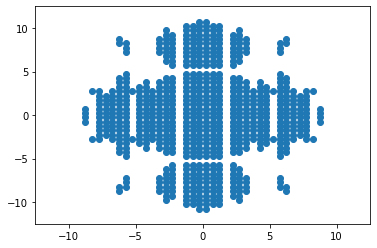

In [14]:
plt.plot(I_x, I_y, 'o')
plt.xlim(-a, a)
plt.ylim(-a, a)

## Calculamos $F(\theta, \phi)$

In [15]:
def f_subarray(u, v):
    if Subarray:
        psi_x = 2 * np.pi * spacing_subarray * u
        psi_y = 2 * np.pi * spacing_subarray * v
        return np.sin(0.5 * M * psi_x) * np.sin(0.5 * N * psi_y) / (np.sin(0.5 * psi_x) * np.sin(0.5 * psi_y))
    else:
        return 1

def f_element(u, v):
    if Element:
        return np.sin(0.5 * np.pi * np.sqrt(1 - u**2 - v**2)) * np.cos(2 * np.pi * 0.495 * u) / np.sqrt(1 - u**2)
    else:
        return 1

def F_theta_phi(u, v):
    F = 0 + 1j*0
    
    for k in range(len(I_mn)):
        exponent = 2 * np.pi * (I_x[k] * u + I_y[k] * v)
        F += I_mn[k] * np.exp(1j * exponent)
        
    return F * f_subarray(u, v) * f_element(u, v)

Creamos o enreixado.

In [16]:
x = np.linspace(- 1, 1, 361, endpoint = True); x[np.where(x == 0)] = 1e-5
X, Y = np.meshgrid(x, x)
len_x = len(x)

out_arg = np.where(X**2 + Y**2 >= 1)

X[out_arg] = 0.5
Y[out_arg] = 0.5

Calculamos os valores do patrón, limpámolo e xeramos a imaxe.

In [17]:
limit = -50

Z = np.abs(F_theta_phi(X, Y))
Z = 2 * pass_to_dB(Z)
clear_around(Z, limit)
Z = np.reshape(Z, (len_x, len_x))


for i in tqdm(range(len_x)):
    for j in range(len_x):
        x_0 = i * np.pi/len_x - np.pi/2
        y_0 = j * np.pi/len_x - np.pi/2
        
        if np.square(x_0*x_0 + y_0*y_0) > np.pi/2:
            Z[i, j] = limit

100%|████████████████████████████████████████| 361/361 [00:00<00:00, 918.83it/s]


Xeramos a imaxe e gardamos resultados.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


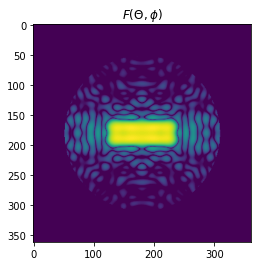

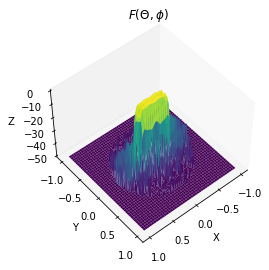

In [18]:
np.savetxt(f'Results/Data/Data_F_{boundary}.txt', Z)

fig = plt.figure(1)
plt.imshow(Z) 
plt.title('$F(\Theta, \phi)$')
plt.savefig(f'Results/Images/Horizontal_F_{boundary}.eps', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
X_plot, Y_plot = np.meshgrid(x, x)
ax.plot_surface(X_plot, Y_plot, Z, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(limit, 0)
plt.title('$F(\Theta, \phi)$')
plt.savefig(f'Results/Images/3D_F_{boundary}.eps', dpi = 300)
ax.view_init(50, 50)

In [19]:
rho = np.sqrt(X_plot**2 + Y_plot**2) * a
beta = np.arctan2(Y_plot, X_plot)

rho = np.reshape(rho, (len_x*len_x))
beta = np.reshape(beta, (len_x*len_x))

Z = np.zeros((len_x*len_x))

for i in tqdm(range(len_x * len_x)):
    Z[i] = np.abs(K_rho_beta(rho[i], beta[i]))

Z = np.reshape(Z, (len_x, len_x))
np.savetxt(f'Results/Data/Data_K_{boundary}.txt', Z)

100%|██████████████████████████████████| 130321/130321 [03:45<00:00, 577.90it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


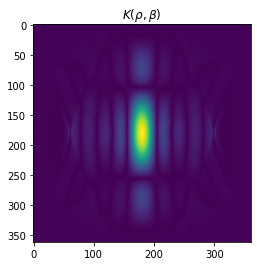

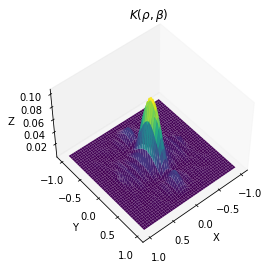

In [20]:
fig = plt.figure(1)
plt.imshow(Z)
plt.title(r'$K(\rho, \beta)$')
plt.savefig(f'Results/Images/Horizontal_K_{boundary}.eps', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, Z, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
plt.title(r'$K(\rho, \beta)$')
plt.savefig(f'Results/Images/3D_K_{boundary}.eps', dpi = 300)
ax.view_init(50, 50)

## Ratio de rango dinámico

In [21]:
def dynamic_range_ratio(array):
    array = np.abs(array)
    return np.max(array) / np.min(array)

print(f'O rango dinámico é de: {dynamic_range_ratio(I_mn)}')

O rango dinámico é de: 49.771089030112


In [22]:
os.remove('Temporal_radial_vector.txt')
print(f'Total execution time is: {np.round(time.perf_counter() - t0, 2)} s')

Total execution time is: 545.89 s
